In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
def second_turn(label,dif):
    if label>0:
        return 0
    if label==0:
        return dif
def fturn(df):
    if list(df['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0
def fturn_test():
    if list(df['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0
column_df=pd.read_csv('columns2k.csv')
col=column_df.columns


In [3]:

training_set=os.listdir("./training_set_df_acc_windowsize3_with_pre_feat3s/")
# training_set=['./gan_win6.csv','./gan_win6.csv']
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc_windowsize3_with_pre_feat3s/{data}"
        if df is None:
            df=pd.read_csv(file)
            df=df.astype(float)
            print(df.shape)
            df['previous_label']=df['label']
            
            df['label']=df['label'].astype("category")
            df['previous_label']=df['label']
            df['previous_label']=df['previous_label'].astype(int)
            df['second_turn']=df['previous_label'].diff()
            df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
            turn=list(df['second_turn'])
            turn_2=[]
            
            if (df['label'][0].item()>0): 
                count=2
            else: 
                count=1
            for i in range(len(turn)):

                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            df['turn']=turn
            df['second_turn']=turn_2
            after1=[]
            
# print(list(df['label'])[0])

            after0=fturn(df)
            sturn=True
            for i in range(len(df.label)):

                if (list(df['label'])[i]==1)|(list(df['label'])[i]==2)|(list(df['label'])[i]==3):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(df)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after1.append(1) 
                else:
                    after1.append(0) 
            df['after1']=after1
            after4=[]
            after0=fturn(df)
            sturn=True
            for i in range(len(df['label'])):
                if (list(df['label'])[i]==4)|(list(df['label'])[i]==5)|(list(df['label'])[i]==6):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(df)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after4.append(1) 
                else:
                    after4.append(0) 

            df['after4']=after4
            df=df.reset_index().rename(columns={df.index.name:'time'})
        else:
            d=pd.read_csv(file)
            d['previous_label']=d['label']
            d['previous_label']=d['previous_label'].astype(int)
            d['label']=d['label'].astype("category")
            d['second_turn']=d['previous_label'].diff()
            d['second_turn']=d.apply(lambda d:second_turn(d['label'],d['second_turn']),axis=1)
            turn=list(d['second_turn'])
            turn_2=[]
            if (d['label'][0].item()>0): 
                count=2
            else: count=1
            for i in range(len(turn)):
                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            d['second_turn']=turn_2
            d['turn']=turn
            after1=[]
            
# print(list(df['label'])[0])

            after0=fturn(d)
            sturn=True
            for i in range(len(d.label)):

                if (list(d['label'])[i]==1)|(list(d['label'])[i]==2)|(list(d['label'])[i]==3):
                    after0-=1
                if (list(d['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(d)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after1.append(1) 
                else:
                    after1.append(0) 
            d['after1']=after1
            after4=[]
            after0=fturn(d)
            sturn=True
            for i in range(len(d['label'])):
                if (list(d['label'])[i]==4)|(list(d['label'])[i]==5)|(list(d['label'])[i]==6):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(d)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after4.append(1) 
                else:
                    after4.append(0) 

            d['after4']=after4
            d=d.reset_index().rename(columns={d.index.name:'time'})
            df=pd.concat([df,d])
# # turn2
# df['previous_label']=df['label']
# df['second_turn']=df['previous_label'].diff()
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
# turn=list(df['second_turn'])
# turn_2=[]

# if (df['label'][0].item()>0): 
#     count=2
# else: 
#     count=1
# for i in range(len(turn)):

#     if turn[i]<-3:
#         count-=1
#     if count<=0:
#         turn_2.append(1) 
#     else:
#         turn_2.append(0) 
# df['turn']=turn
# df['second_turn']=turn_2

# # add gan/sdv
# gan=pd.read_csv('./SDV_gen_1k.csv')
# df=pd.concat([df,gan])
# df=df.drop('Unnamed: 0',axis=1)



(211, 8682)


# add gan function

In [4]:
for file in os.listdir('./gan_final_2k'):
    gan=pd.read_csv(f'./gan_final_2k/{file}')
# gan=gan.drop(['Index'],axis=1)

    df=pd.concat([df,gan],axis=0)
try:
    df=df.drop('Unnamed: 0',axis=1)
except:
    pass



In [5]:
df[['label','second_turn','turn','after1']].to_csv('./check/check.csv')

In [6]:
df=df.drop(['second_turn','turn'],axis=1)

In [7]:
# df=df.astype(float)
# df['previous_label']=df['label']
# df['label']=df['label'].astype(int)
# df['label']=df['label'].astype("category")
# df['second_turn']=df['previous_label'].diff
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['dif']))
# turn=list(df['second_turn'])

In [8]:
# is_2=False
# turn_2=[]
# for i in len(turn):
#     if turn[i]>2:
#         is_2=True
#     if !is_2:
#         return 0
#     return 1
# df['second_turn']=turn_2

In [9]:
test=pd.read_csv('./test_set_df_acc_windowsize3_with_pre_feat3s/S08T2.csv')
df=df.fillna(0)

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7746 entries, 0 to 170
Data columns (total 8685 columns):
 #     Column                                                          Dtype  
---    ------                                                          -----  
 0     index                                                           int64  
 1     left_elbow_shoulder_hip mean_ft                                 float64
 2     left_elbow_shoulder_hip std_ft                                  float64
 3     left_elbow_shoulder_hip max_ft                                  float64
 4     left_elbow_shoulder_hip min_ft                                  float64
 5     left_elbow_shoulder_hip var_ft                                  float64
 6     left_elbow_shoulder_hip med_ft                                  float64
 7     left_elbow_shoulder_hip sum_ft                                  float64
 8     left_elbow_shoulder_hip kurtosis                                float64
 9     left_elbow_shoulder_h

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

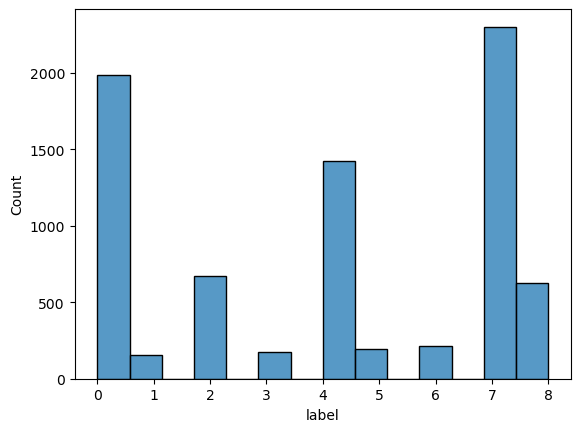

In [11]:
sns.histplot(df["label"])

In [12]:
X=df.drop(["label","previous_label",'after1','after4'],axis=1)
y=df['label']

In [13]:
X.shape

(7746, 8681)

In [14]:
y.shape

(7746,)

In [15]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [16]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [17]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [18]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [19]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [20]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [21]:
# from sklearn.feature_selection import SelectKBest,f_regression,chi2#,f_classif
# # Applying SelectKBest class to extract top 15 best features
# fs = SelectKBest(score_func=f_regression,k=15)#f_regression
# # Applying feature selection
# fit = fs.fit(X,y)

# features_score = pd.DataFrame(fit.scores_)
# features = pd.DataFrame(X.columns)
# feature_score = pd.concat([features,features_score],axis=1)
# # Assigning column names
# feature_score.columns = ["Input_Features","F_Score"]
# print(feature_score.nlargest(2000,columns="F_Score"))
a=list(col[:-4])
X=X.loc[:,a]

# dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

In [22]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
test=test.reset_index(drop=False)
X_test=test.drop(["label","previous_label"],axis=1)
X_test=X_test.loc[:,a]
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']
b=a+['after1','after4']


In [23]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf.fit(all_feature_smote, all_label_smote)
# # filename = './model/smote_rf_model.sav'
# # rf=joblib.load(filename)
# pred_rf=rf.predict(X_test)

# print(metrics.classification_report(pred_rf,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
# sns.heatmap(conf,annot=True)
X_train.shape


(7746, 2000)

In [24]:
# filename = './model/smote_rf_model2.sav'
# joblib.dump(rf, filename)

In [25]:
# b=[e for e in X_train if e not in X_test]
# b

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

[0]	validation_0-mlogloss:1.68877
[1]	validation_0-mlogloss:1.46807
[2]	validation_0-mlogloss:1.31353
[3]	validation_0-mlogloss:1.18152
[4]	validation_0-mlogloss:1.06343
[5]	validation_0-mlogloss:0.96367
[6]	validation_0-mlogloss:0.89289
[7]	validation_0-mlogloss:0.82703
[8]	validation_0-mlogloss:0.77797
[9]	validation_0-mlogloss:0.74551
[10]	validation_0-mlogloss:0.69675
[11]	validation_0-mlogloss:0.66442
[12]	validation_0-mlogloss:0.62715
[13]	validation_0-mlogloss:0.60700
[14]	validation_0-mlogloss:0.58309
[15]	validation_0-mlogloss:0.56993
[16]	validation_0-mlogloss:0.55096
[17]	validation_0-mlogloss:0.52690
[18]	validation_0-mlogloss:0.51305
[19]	validation_0-mlogloss:0.49752
[20]	validation_0-mlogloss:0.48259
[21]	validation_0-mlogloss:0.47249
[22]	validation_0-mlogloss:0.46942
[23]	validation_0-mlogloss:0.46166
[24]	validation_0-mlogloss:0.45163
[25]	validation_0-mlogloss:0.43554
[26]	validation_0-mlogloss:0.43001
[27]	validation_0-mlogloss:0.43007
[28]	validation_0-mlogloss:0.4

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

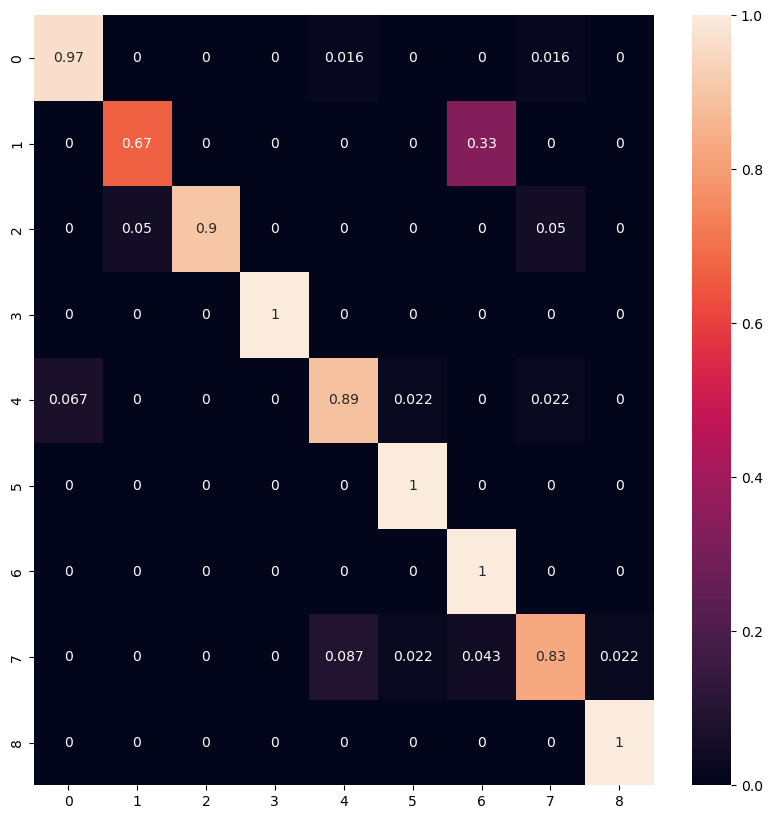

In [26]:
from xgboost import XGBClassifier#XGBcalssifier
from xgboost import callback
early_stop = callback.EarlyStopping(
    rounds=4, metric_name='mlogloss', save_best=True
)
try:
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    pred_xgb=xgbcl.predict(X_test)
except:
    xgbcl=XGBClassifier( eval_metric='mlogloss', random_state=10,callbacks=[early_stop])
    xgbcl.fit(all_feature_smote, all_label_smote,eval_set=[(X_test, y_test)])
    pred_xgb=xgbcl.predict(X_test)

from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [27]:
# X_train_with_predictions.shape

In [28]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='aucs‌', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [29]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [30]:
filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
joblib.dump(xgbcl, filename)

['./model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav']

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        62
         1.0       0.67      0.50      0.57         4
         2.0       1.00      0.86      0.92        21
         3.0       1.00      0.75      0.86         4
         4.0       0.93      0.91      0.92        46
         5.0       0.60      0.75      0.67         4
         6.0       0.40      1.00      0.57         2
         7.0       0.93      0.93      0.93        41
         8.0       0.82      1.00      0.90         9

    accuracy                           0.91       193
   macro avg       0.81      0.85      0.81       193
weighted avg       0.92      0.91      0.91       193



<Axes: >

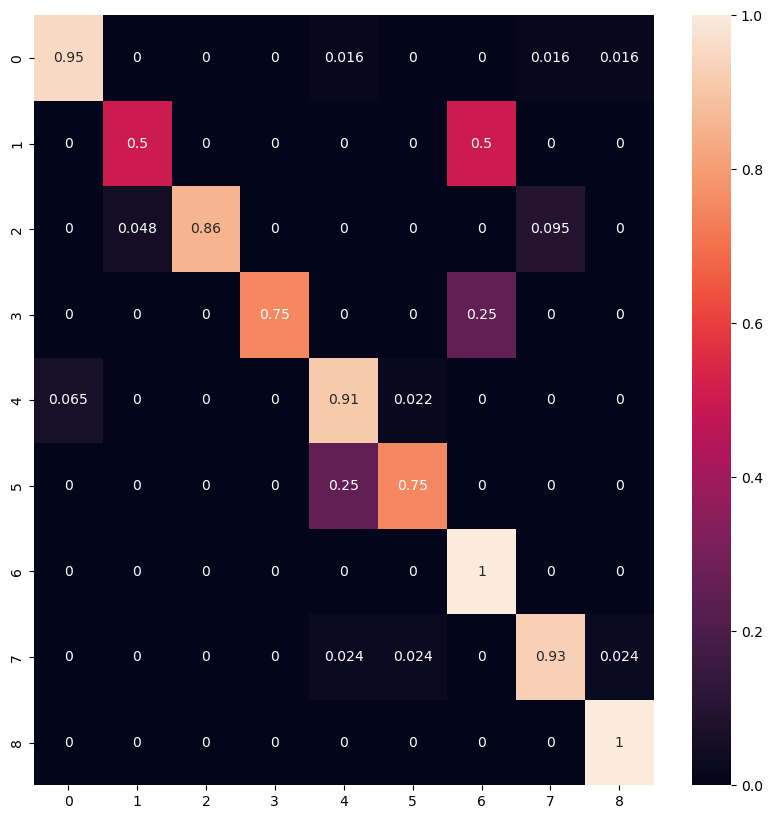

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGBC=HistGradientBoostingClassifier(random_state=10,class_weight='balanced')
# HGBC.fit(X_train,y_train)
try:
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav'
    HGBC=joblib.load(filename)
    pred=HGBC.predict(X_test)
except:
    HGBC.fit(all_feature_smote, all_label_smote )
    pred=HGBC.predict(X_test)


print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [32]:
filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav'
joblib.dump(HGBC, filename)

['./model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav']

In [33]:
print(a)

['movingright_shoulder right_wrist dx var_ft', 'movingright_shoulder right_wrist dx mae', 'movingright_shoulder right_wrist dy quantile25e', 'movingright_shoulder right_wrist dy mae', 'movingright_shoulder right_wrist dy var_ft', 'movingright_shoulder right_wrist dx quantile 75', 'movingright_shoulder right_elbow dx mae', 'movingright_shoulder right_elbow dx var_ft', 'movingright_wrist_x mae', 'movingright_wrist_x var_ft', 'movingright_wrist_y var_ft', 'movingright_wrist_y mae', 'movingright_shoulder right_wrist dx mae previous 3 s', 'movingright_shoulder right_wrist dx var_ft previous 3 s', 'movingright_shoulder right_wrist dy mae previous 3 s', 'movingright_shoulder right_wrist dy var_ft previous 3 s', 'movingright_shoulder right_wrist dx RMS', 'movingright_shoulder right_elbow dy mae', 'movingright_shoulder right_elbow dy var_ft', 'movingright_shoulder right_wrist dy RMS', 'movingright_shoulder right_wrist dy quantile25e previous 3 s', 'movingright_shoulder right_wrist dx quantile25

In [34]:
# def predict0_4(df):
# #     print(df['label_pred'])
# #     print(df['label_pred'] in [1,2,3,5,6,7,8])
#     if df['previous_label'] in [1,2,3,5,6,7,8]:
#         return df['previous_label']
#     else:
# #         print(np.array(df.drop(["label","previous_label",'label_pred'])))
# # xgb_class0_4
#         return xgbcl.predict(np.array(df.drop(["label",'previous_label'
#                                     ])).reshape(1,-1)).view().item()

In [35]:
# from sklearn.ensemble import AdaBoostClassifier
# test['previous_label']=pred_xgb
# # test['previous_label']=list(pred_xgb).insert(0,0)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label",'previous_label'],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4=np.array(X_train_class0_4)
# y_train_class0_4=np.array(y_train_class0_4)
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# xgb_class0_4=RandomForestClassifier(random_state=10,n_estimators=30,criterion='gini')#XGBClassifier( eval_metric='logloss', random_state=10)
# try:
#     print('sm')
# #     xgb_class0_4.fit(X_train_class0_4sm, y_train_class0_4sm)
# except:
#     print('no sm')
# #     xgb_class0_4.fit(X_train_class0_4, y_train_class0_4)
# test['label_pred']=test.apply(lambda x:predict0_4(x),axis=1)

# # test_class0_4=test[(test['label_pred'].isin([0,4]))&(test['label'].isin([0,4]))]
# # X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# # y_test_class0_4=test_class0_4.label
# # # X_test_class0_4=np.array(X_test_class0_4)
# # # y_test_class0_4=np.array(y_test_class0_4)

# # pred_class0_4=xgb_class0_4.predict(X_test_class0_4)
# print(metrics.classification_report(test['label'],test['label_pred']))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(test['label'],test['label_pred'], normalize='true')
# sns.heatmap(conf,annot=True)

In [36]:
test['label1']=pred
# turn2
test['previous_label']=test['label1']
test['second_turn']=test['previous_label'].diff()
test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
turn=list(test['second_turn'])
turn_2=[]

if (test['label1'][0].item()>0): 
    count=2
else: 
    count=1
for i in range(len(turn)):

    if turn[i]<-3:
        count-=1
    if count<=0:
        turn_2.append(1) 
    else:
        turn_2.append(0) 
test['turn']=turn
test['second_turn']=turn_2
            
print(list(test['label1'])[0])
def fturn_test():
    if list(test['label1'])[0]>0: 
        after0=1
    else: after0=1
    return after0
after0=fturn_test()
sturn=True
after1=[]
after4=[]
for i in range(len(test['label1'])):

    if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn_test()
        sturn=False
    if after0<=0:
#         print(after0)
        after1.append(1) 
    else:
        after1.append(0) 
after0=fturn_test()
sturn=True
for i in range(len(test['label1'])):
    if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn_test()
        sturn=False
    if after0<=0:
#         print(after0)
        after4.append(1) 
    else:
        after4.append(0) 


test['after1']=after1
test['after4']=after4
test=test.drop(['second_turn','turn'],axis=1)

8.0


In [37]:
X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
X_test_a=X_test_a.loc[:,b]
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test_a=test['label']

X=df.drop(["label","previous_label"],axis=1)
y=df['label']
X_train_a=X.copy()#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
X_train_a=X_train_a.loc[:,b]
# print(X_train_a)

y_train_a=y

all_feature_smote_a, all_label_smote_a = sm.fit_resample(X_train_a,y_train_a)

learning
              precision    recall  f1-score   support

         0.0       0.47      0.91      0.62        32
         1.0       0.33      0.25      0.29         4
         2.0       0.50      1.00      0.67         9
         3.0       0.33      1.00      0.50         1
         4.0       0.91      0.60      0.73        68
         5.0       0.80      0.29      0.42        14
         6.0       0.40      1.00      0.57         2
         7.0       0.98      0.73      0.83        55
         8.0       0.73      1.00      0.84         8

    accuracy                           0.70       193
   macro avg       0.61      0.75      0.61       193
weighted avg       0.80      0.70      0.71       193



<Axes: >

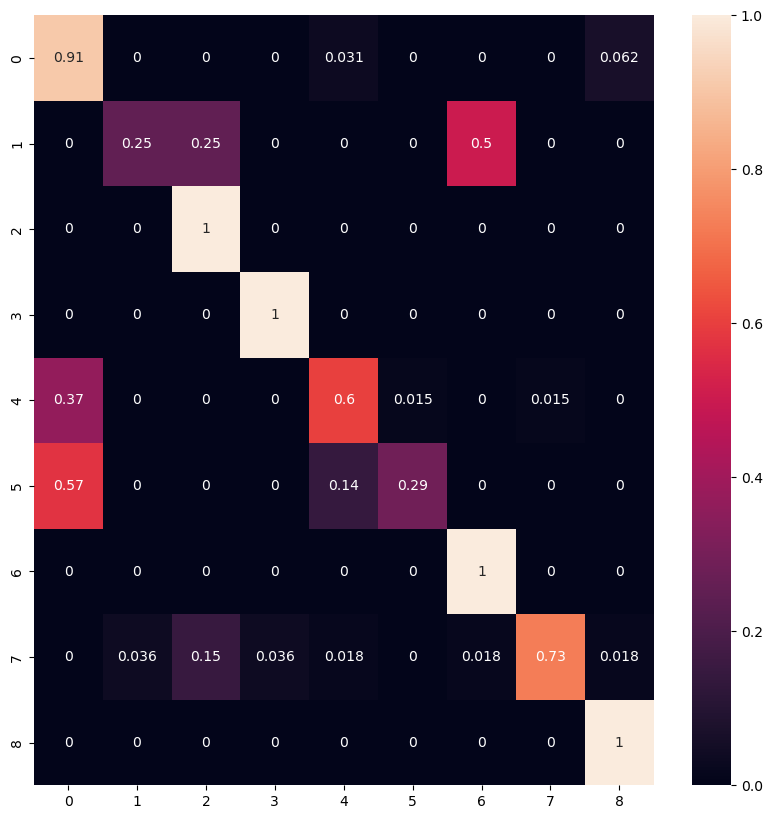

In [38]:
try:
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav'
    HGBC=joblib.load(filename)
    pred_a=HGBC.predict(X_test_a)
except:
    print('learning')
    HGBC=HistGradientBoostingClassifier(random_state=10,class_weight='balanced')
    HGBC.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=HGBC.predict(X_test_a)


print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [39]:
# XGB=RandomForestClassifier(random_state=10)
# XGB.fit(all_feature_smote_a, all_label_smote_a)

# pred_b=XGB.predict(X_test_a)

# print(metrics.classification_report(pred_b,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_b,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [40]:
filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav'
joblib.dump(HGBC, filename)

['./model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav']

learning


/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

              precision    recall  f1-score   support

           0       0.47      0.97      0.63        30
           1       0.33      0.33      0.33         3
           2       0.56      1.00      0.71        10
           3       0.33      1.00      0.50         1
           4       0.89      0.58      0.70        69
           5       0.60      0.27      0.37        11
           6       0.40      1.00      0.57         2
           7       0.98      0.69      0.81        58
           8       0.82      1.00      0.90         9

    accuracy                           0.70       193
   macro avg       0.60      0.76      0.61       193
weighted avg       0.80      0.70      0.71       193



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

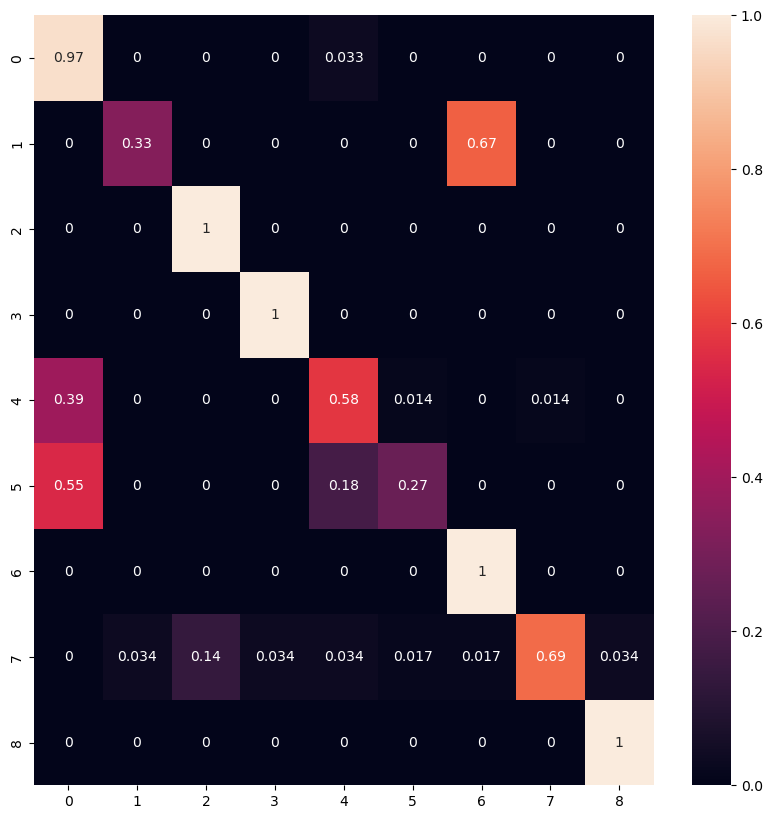

In [41]:
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from seqlearn.perceptron import StructuredPerceptron

try:
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model_after.sav'
    xgbafter=joblib.load(filename)
    pred_a=xgbafter.predict(X_test_a)
except:
    print('learning')
    xgbafter=XGBClassifier( eval_metric='mlogloss', random_state=10)
    xgbafter.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=xgbafter.predict(X_test_a)
    
print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [42]:
filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model_after.sav'
joblib.dump(xgbafter, filename)

['./model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model_after.sav']

In [43]:
# from sklearn.ensemble import GradientBoostingClassifier
# # import six
# # import sys
# # sys.modules['sklearn.externals.six'] = six
# # from seqlearn.perceptron import StructuredPerceptron

# try:
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_ada_model_after.sav'
#     ada=joblib.load(filename)
#     pred_a=ada.predict(X_test_a)
# except:
    
#     print('learning')
#     ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     ada.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=ada.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [44]:
# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_ada_model_after.sav'
# joblib.dump(ada, filename)

In [45]:
# from sklearn.model_selection import GridSearchCV
# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_grid_model_after.sav'
# try:
#     clf=joblib.load(filename)
#     pred_a=clf.predict(X_test_a)  
# except:

#     parameters = {
#         "loss":[ 'log_loss'],
#         "learning_rate": [ 0.1, 0.5, 0.2,0.05,0.01],#0.01, 0.025, 0.05, 0.075,
# #         "min_samples_split": np.linspace(0.1, 0.5, 12),
# #         "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#         "max_depth":[8,50],
#         "max_features":["log2","sqrt"],
#         "criterion": ["friedman_mse",  'squared_error']
# #         "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
# #         "n_estimators":[10]
#         }
#     clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1)
#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     clf.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=clf.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [46]:
# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_grid_model_after.sav'
# joblib.dump(ada, filename)

In [47]:
# from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier,RandomTreesEmbedding,ExtraTreesClassifier,RandomForestClassifier
# VC=VotingClassifier(estimators=[('HGBC',HGBC),
#                                  ('XGB',xgbafter),
#                                ('RTE',ExtraTreesClassifier()),
#                                ('RF',RandomForestClassifier()),
#                                ('BG',BaggingClassifier())],
#                     weights=[7,7,5,5,5],
#                     voting='soft'
#                    )
# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_VC2_model_after.sav'
# try:
#     VC=joblib.load(filename)
#     pred_a=VC.predict(X_test_a)  
# except:

#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     VC.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=VC.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [48]:
# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_VC2_model_after.sav'
# joblib.dump(VC, filename)

In [49]:
# from sklearn.ensemble import VotingClassifier,StackingClassifier,RandomTreesEmbedding,ExtraTreesClassifier
# RTE=ExtraTreesClassifier()

# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_RTE_model_after.sav'
# try:
#     RTE=joblib.load(filename)
#     pred_a=RTE.predict(X_test_a)  
# except:

#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     RTE.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=RTE.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [50]:
# filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_RTE_model_after.sav'
# joblib.dump(RTE, filename)

In [51]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [52]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [53]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [54]:
# from keras.layers import TimeDistributed
# # # trainX=np.array(X_train)
# # testX=np.array(X_test)
# # # trainY=np.array(y_train)
# # testY=np.array(y_test)
# # trainX=np.array(all_feature_smote)
# # trainY=np.array(all_label_smote)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label","previous_label"],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# trainX=np.array(X_train_class0_4sm)
# trainY=np.array(y_train_class0_4sm)

# test_class0_4=test[test['label'].isin([0,4])]
# X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# y_test_class0_4=test_class0_4.label
# testX=np.array(X_test_class0_4)
# testY=np.array(y_test_class0_4)

# # # testY = tf.keras.utils.to_categorical(testY)
# # # trainY = tf.keras.utils.to_categorical(trainY)
# # trainX = np.expand_dims(trainX, 2)
# # testX = np.expand_dims(testX, 2)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Input(shape=(len(trainX[1]), 1)))
# model.add(layers.Conv1D(64,64, activation='relu'))
# # model.add(LSTM(units=3, return_sequences=True))
# # model.add(LSTM(units=64, return_sequences=True))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(32, 32, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Conv1D(16, 16, activation='relu'))
# model.add(LSTM(units=64, return_sequences=True))
# # model.add(LSTM(units=32, return_sequences=True))
# model.add(LSTM(units=16, return_sequences=True))
# model.add(Dropout(0.5))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(9,activation='softmax'))
# mcp_save = ModelCheckpoint('DL_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping,mcp_save])

In [55]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [56]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [57]:
# model_rnn = Sequential()
# model_rnn.add(LSTM(units=64, return_sequences=True, input_shape=(len(trainX[1]), 1)))
# model_rnn.add(Conv1D(128, 6))
# model_rnn.add(LSTM(units = 64, return_sequences = True))
# model_rnn.add(Dropout(0.2))
# model_rnn.add(Conv1D(128, 3))
# model_rnn.add(LSTM(units = 64, return_sequences = True))

# model_rnn.add(Dropout(0.2))
# model_rnn.add(LSTM(units = 64))

# model_rnn.add(Dense(units = 128))
# model_rnn.add(Dense(units = 64))

# model_rnn.add(Dense(units = 9, activation="softmax")) #4 as the output classes

# # Define the BRNN model with LSTM layers
# model_brnn = keras.Sequential([
#     layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True), 
#                          input_shape=(len(trainX[1]), 1)),
# #     layers.Bidirectional(layers.LSTM(64, activation='relu')),
# #     layers.Bidirectional(layers.LSTM(32, activation='relu')),
#     layers.Bidirectional(layers.LSTM(16, activation='relu')),
    
#     layers.Dense(9, activation='softmax')
# ])

In [58]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Compile the RNN model
# model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Compile the BRNN model
# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the RNN model with early stopping

# ## model_rnn.fit(all_feature, all_label, epochs=100, batch_size=500, validation_data=(X_vad, y_vad), callbacks=[early_stopping])

# # Train the BRNN model with early stopping

# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # history_brnn=model_brnn.fit(trainX,trainY, epochs=10, batch_size=500,
# #                             validation_data=(testX,testY), callbacks=[early_stopping])
# # , callbacks=[early_stopping]

In [59]:
# history_rnn=model_rnn.fit(trainX,trainY, epochs=20,
#                             validation_data=(testX,testY), callbacks=[early_stopping])


In [60]:
len(all_label_smote)

20718

In [61]:
# import scipy
# pred_aa=pd.Series(pred_a)
# pred_aa=pred_aa.rolling(3, min_periods=1).apply(scipy.stats.mode)
# pred_aa=pred_aa.apply(np.ceil)
# pred_aa=np.array(pred_aa)
# print(metrics.classification_report(pred_aa,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_aa,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [62]:
# def output_xgb_no_pre(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [63]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
# out_xgb_no_pre=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_xgb_no_pre(ID,out_xgb_no_pre)
# out_df_xgb_no_pre=pd.DataFrame(out_xgb_no_pre,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])
# out_df_xgb_no_pre

In [64]:
# def output_HGBC_no_pre(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [65]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
# test_set=os.listdir('./gan_final')
# out_rf_no_pre=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_HGBC_no_pre(ID,out_rf_no_pre)
# out_df_rf_no_pre=pd.DataFrame(out_rf_no_pre,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])
# out_df_rf_no_pre

In [66]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
    X_test=X_test.loc[:,a]
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    pred1=pred.copy()
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test_2_turn=test['second_turn'].to_list()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]
    buffer=False
    if (test['label1'][0].item()>0) or (test['label1'][1].item()>0) or (test['label1'][2].item()>0): 
        count=2
        buffer=True
    else: 
        count=1
#     print(ID)
#     print(list(test['label1']))
    buffer0=False
    buffer7=False
    buffer=True
    for i in range(len(turn)):
        
        if (list(test['label1'])[i]<5):
            if (turn[i]<-5):
                if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):
            
                    count-=1
#             if (list(test['label1'])[i]==0):
#                 if (list(test['label1'])[i-1]>6):
#                     if (turn[i]<-3):
#                         count-=1
#                         buffer=False
        else:
#             if ID[:5]=='N02T2':
#                     print(turn[i])
#                     print(list(test['label1'])[i])
            if (turn[i]<-4):
                count-=1
#                 if ID[:5]=='N02T2':
#                     print(count)
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                buffer0=True
            if (list(test['label1'])[i]==7)&(list(test['label1'])[i+1]==7):
                buffer7=True
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0)&(buffer7==True)&(buffer0==True)&(buffer==True):
                    count-=1
                    buffer=False
        except: pass
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after00=[]
    for i in range(len(test['label1'])):
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                after0-=1
            if ((list(test['second_turn'])[i]>0) and sturn==True):
                after0=fturn_test()
                sturn=False
            if after0<=0:
        #         print(after0)
                after00.append(1) 
            else:
                after00.append(0)
        except: after00.append(0)
    test['after00']=after00
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):
        if (list(test['after00'])[i]==1):
            if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['after1'])[i]==1):
            if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4

    test=test.drop(['second_turn','turn','after00'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    X_test_a=X_test_a.loc[:,b]
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [67]:
# out_df_xgb

8
8
8
8
8
8
8
0
8
8
8
8


,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,7.000000,11.000000,8.000000,12.000000,10.000000,10.000000,12.000000,12.000000
mean,0.776478,0.770505,0.857227,0.642857,0.695645,0.623352,0.734624,0.573826,0.641825,0.827901,0.735966
std,0.137156,0.141578,0.173998,0.178174,0.212787,0.277530,0.187587,0.258219,0.237470,0.150727,0.182055
min,0.537954,0.472291,0.384615,0.500000,0.300000,0.111111,0.444444,0.153846,0.250000,0.539326,0.469136
25%,0.657282,0.660653,0.867774,0.500000,0.533597,0.500000,0.559696,0.458333,0.476190,0.707412,0.600133
50%,0.811070,0.814900,0.917811,0.666667,0.777778,0.593407,0.713208,0.535714,0.619048,0.926655,0.732441
75%,0.875644,0.865416,0.945199,0.666667,0.856209,0.822222,0.911894,0.712121,0.842857,0.934585,0.869048
max,0.932642,0.929462,1.000000,1.000000,0.947368,1.000000,0.976190,1.000000,1.000000,0.956522,1.000000


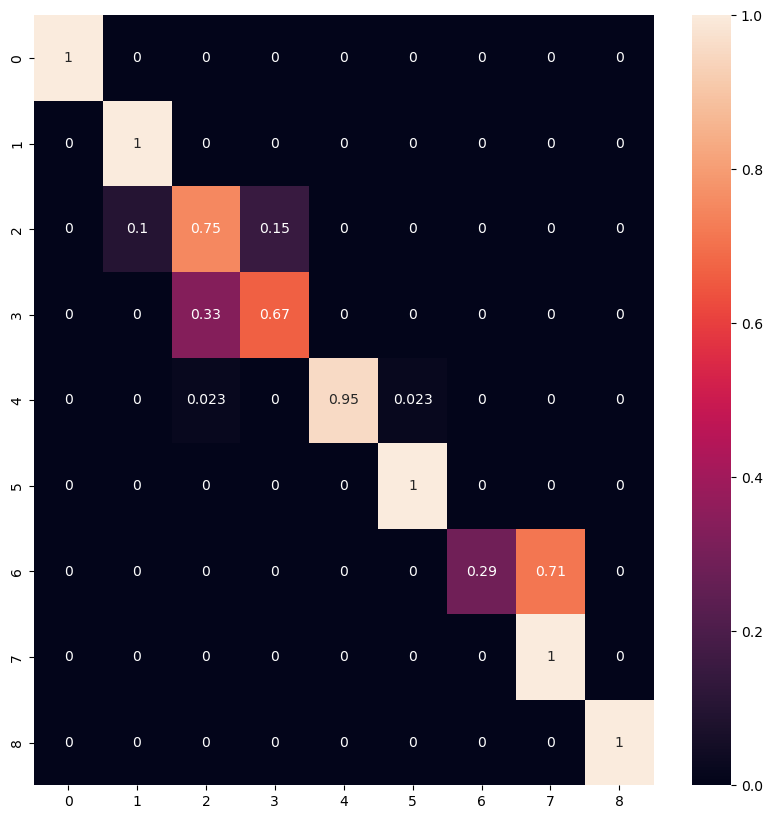

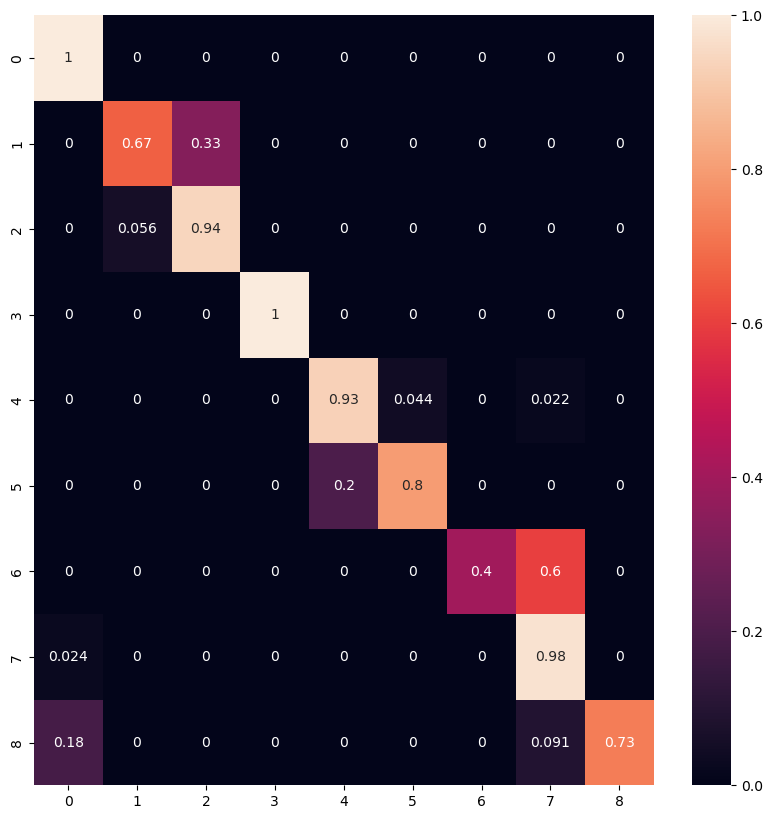

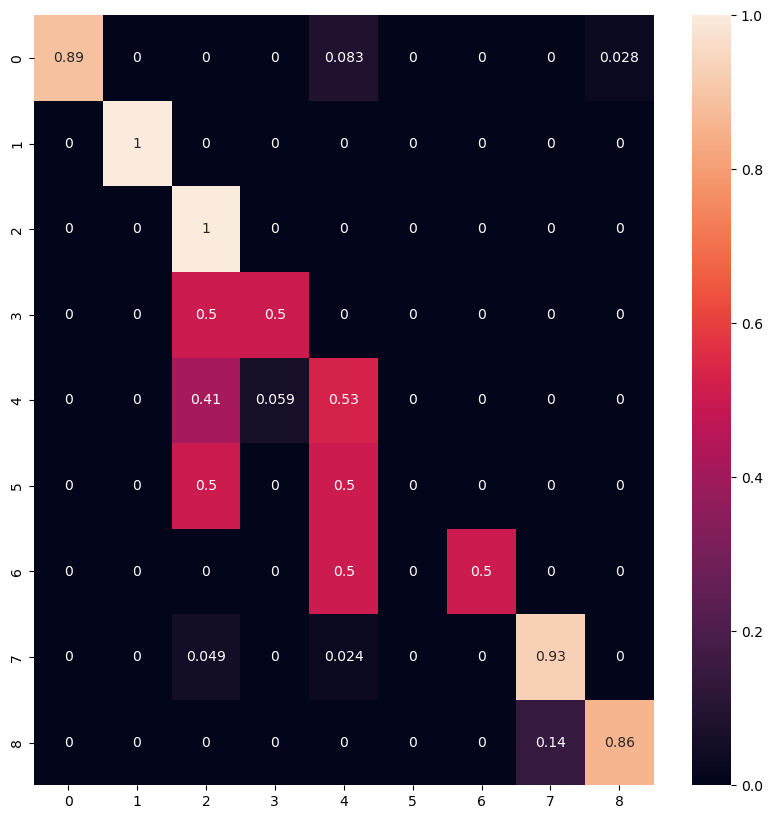

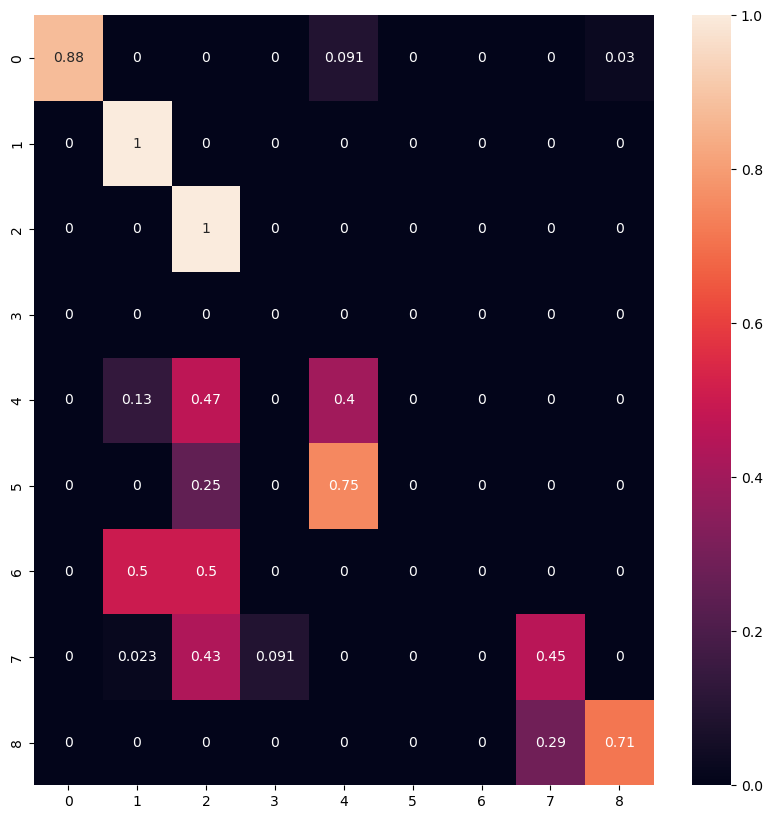

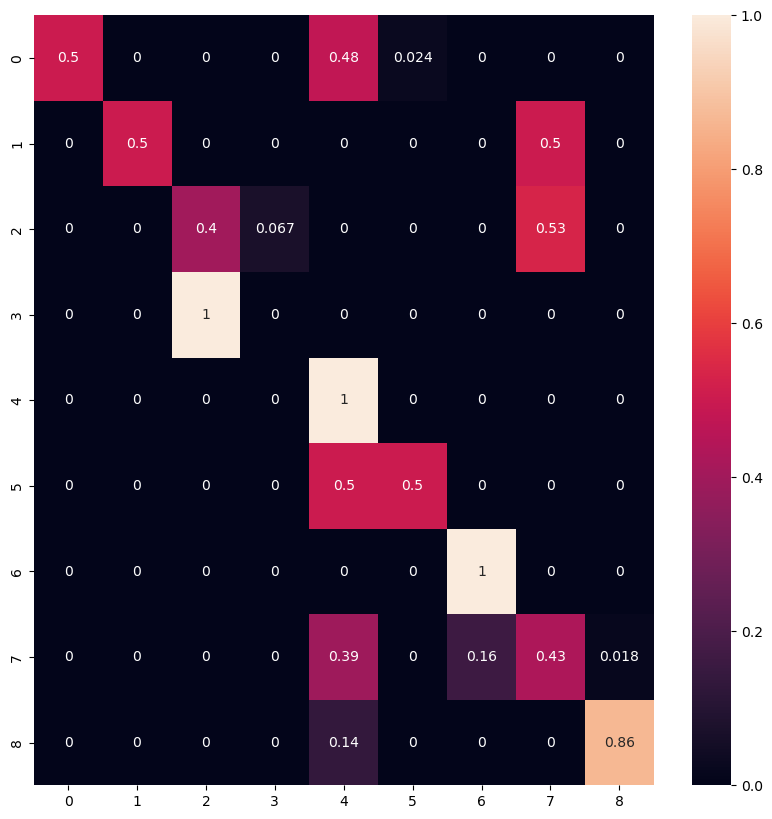

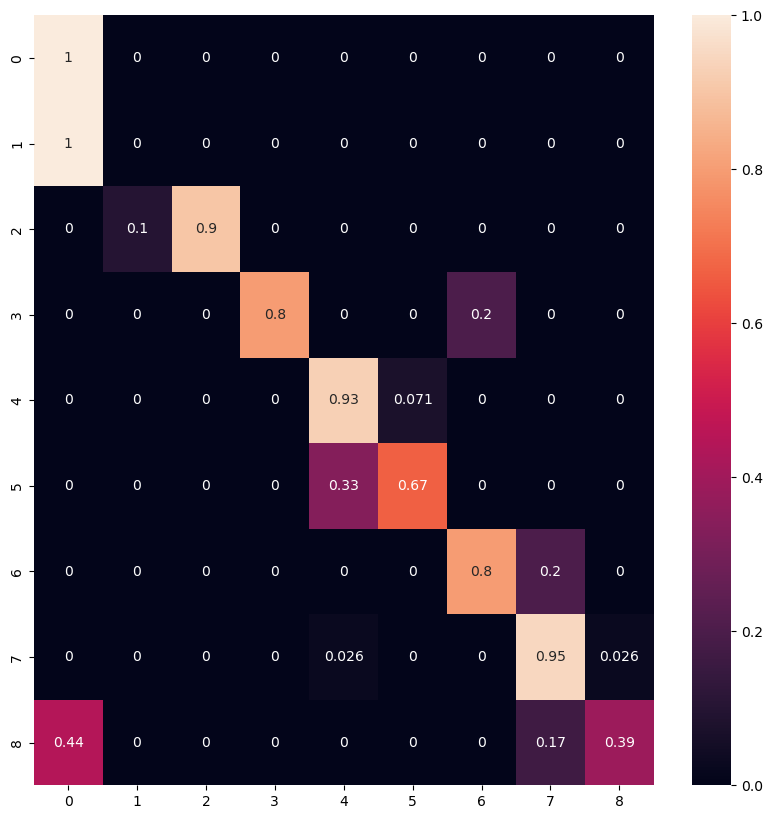

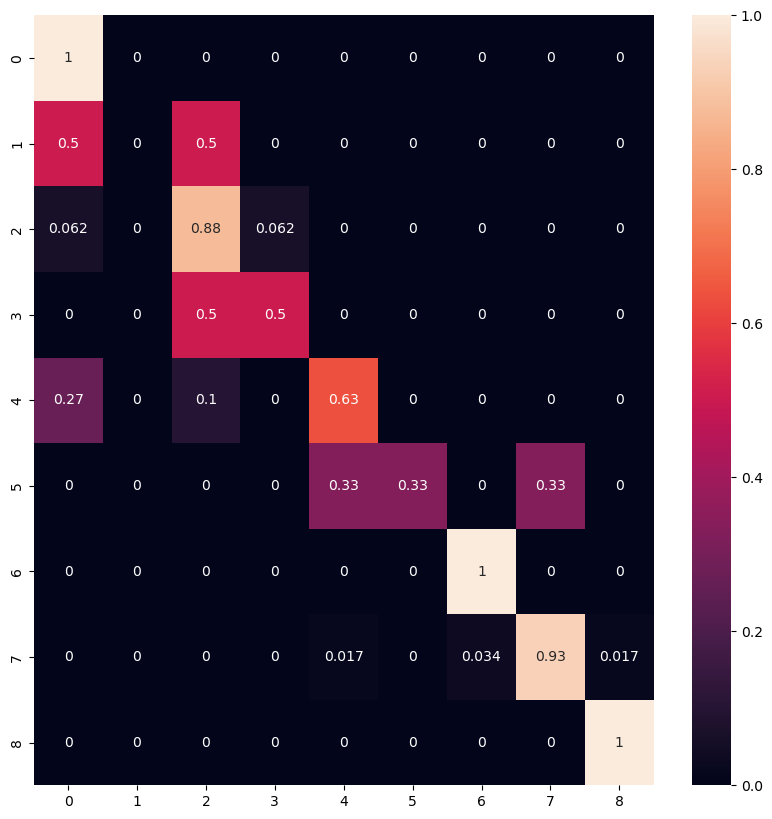

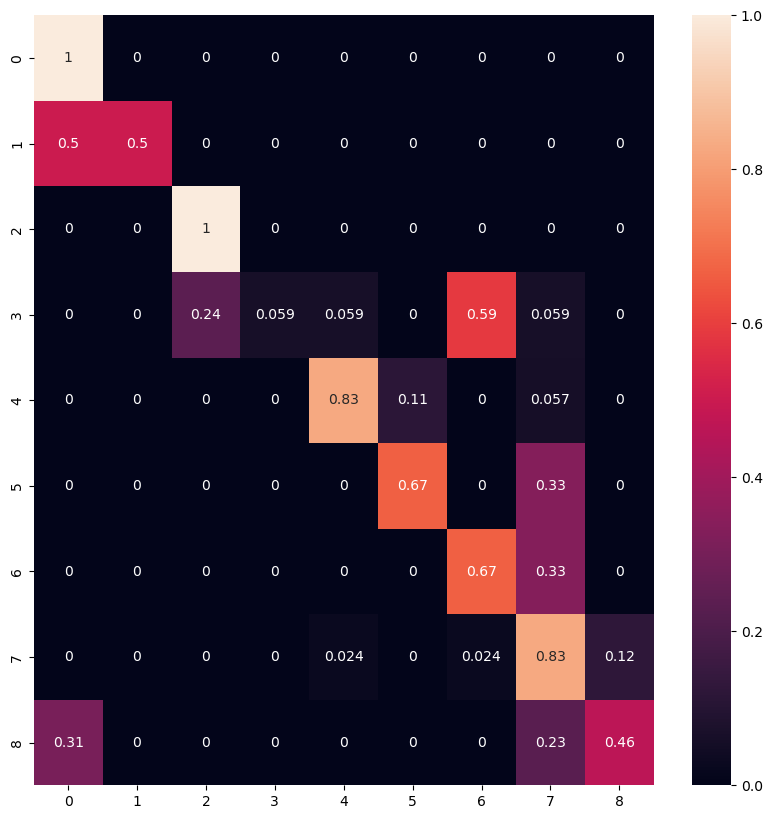

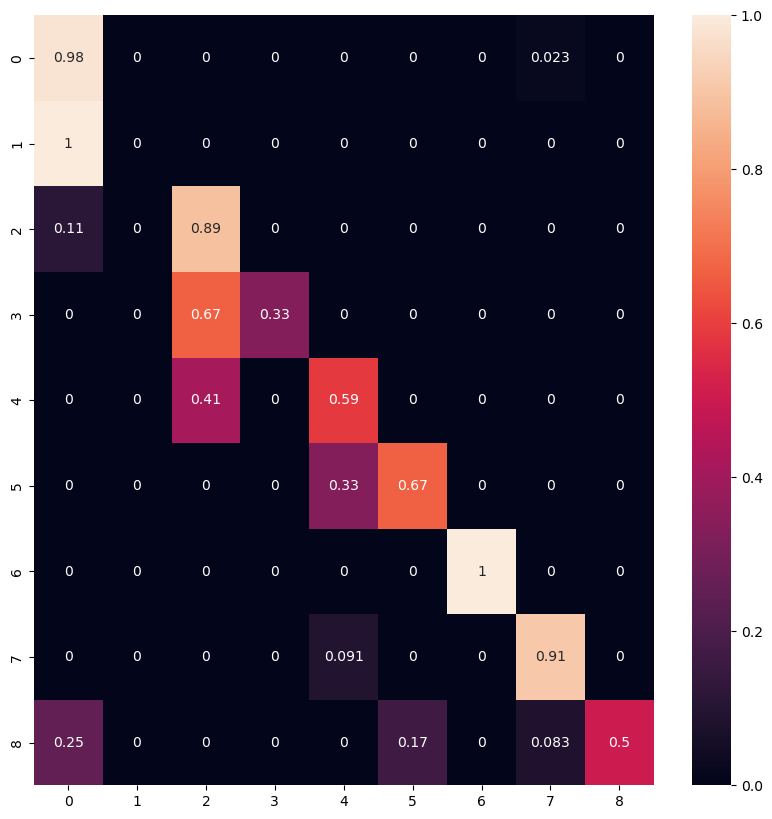

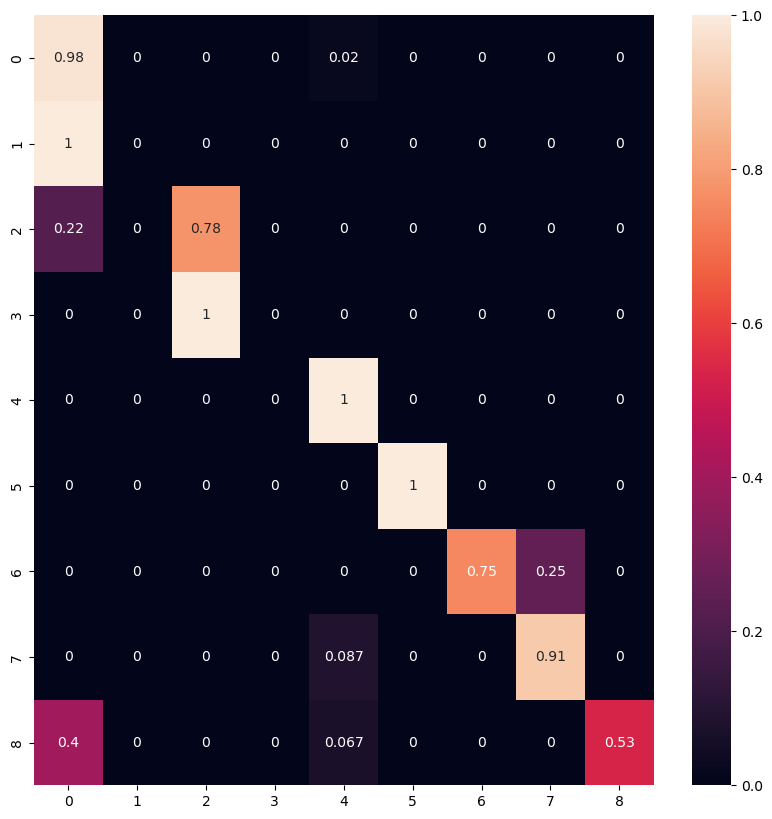

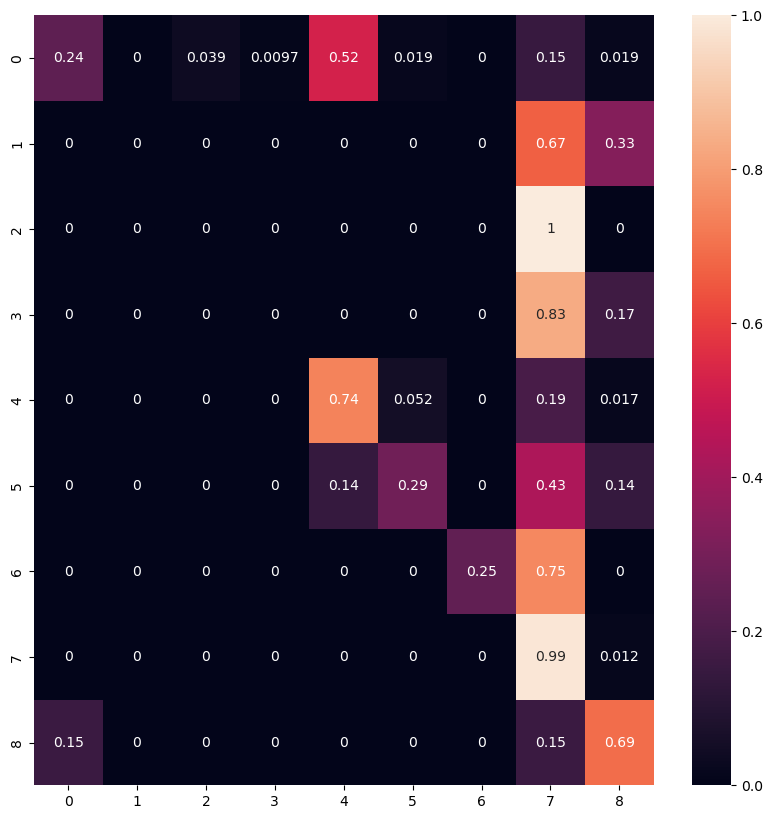

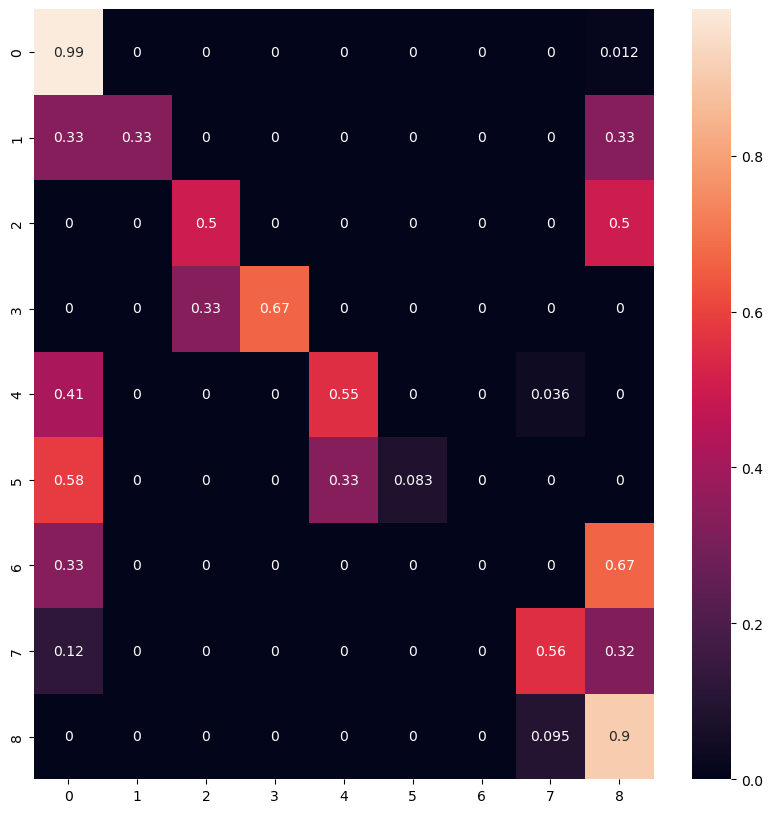

In [68]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
out_xgb=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb)

out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb.describe()

In [87]:
def output_xgb2(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
    X_test=X_test.loc[:,a]
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    pred1=pred.copy()
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test_2_turn=test['second_turn'].to_list()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]
    buffer=False
    if (test['label1'][0].item()>0) or (test['label1'][1].item()>0) or (test['label1'][2].item()>0): 
        count=2
        buffer=True
    else: 
        count=1
#     print(ID)
#     print(list(test['label1']))
    buffer0=False
    buffer7=False
    buffer=True
    for i in range(len(turn)):
        
        if (list(test['label1'])[i]<5):
            try:
                if (turn[i]<-5):
                    if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):

                        count-=1
            except: pass
#             if (list(test['label1'])[i]==0):
#                 if (list(test['label1'])[i-1]>6):
#                     if (turn[i]<-3):
#                         count-=1
#                         buffer=False
        else:
#             if ID[:5]=='N02T2':
#                     print(turn[i])
#                     print(list(test['label1'])[i])
            if (turn[i]<-4):
                count-=1
#                 if ID[:5]=='N02T2':
#                     print(count)
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                buffer0=True
            if (list(test['label1'])[i]==7)&(list(test['label1'])[i+1]==7):
                buffer7=True
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0)&(buffer7==True)&(buffer0==True)&(buffer==True):
                    count-=1
                    buffer=False
        except: pass
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after00=[]
    for i in range(len(test['label1'])):
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                after0-=1
            if ((list(test['second_turn'])[i]>0) and sturn==True):
                after0=fturn_test()
                sturn=False
            if after0<=0:
        #         print(after0)
                after00.append(1) 
            else:
                after00.append(0)
        except: after00.append(0)
    test['after00']=after00
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):
        if (list(test['after00'])[i]==1):
            if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['after1'])[i]==1):
            if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4

    test=test.drop(['second_turn','turn','after00'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    X_test_a=X_test_a.loc[:,b]
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0


,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,8.000000,12.000000,7.000000,12.000000,8.000000,8.000000,12.000000,12.000000
mean,0.779247,0.776927,0.907103,0.704762,0.731773,0.630080,0.728662,0.575694,0.653083,0.782016,0.753470
std,0.138412,0.136837,0.110481,0.176255,0.255491,0.316048,0.210791,0.208969,0.232674,0.149737,0.213941
min,0.534653,0.511609,0.616071,0.500000,0.300000,0.111111,0.323810,0.250000,0.285714,0.580645,0.428571
25%,0.654711,0.682602,0.899279,0.553571,0.552273,0.500000,0.646364,0.475000,0.539683,0.667352,0.599220
50%,0.815176,0.808805,0.939976,0.733333,0.859133,0.750000,0.721416,0.550000,0.666667,0.776342,0.818421
75%,0.892861,0.881322,0.979546,0.800000,0.910753,0.813187,0.917450,0.700000,0.730769,0.917659,0.911905
max,0.946237,0.942190,1.000000,1.000000,1.000000,0.923077,0.976190,0.888889,1.000000,0.975610,1.000000


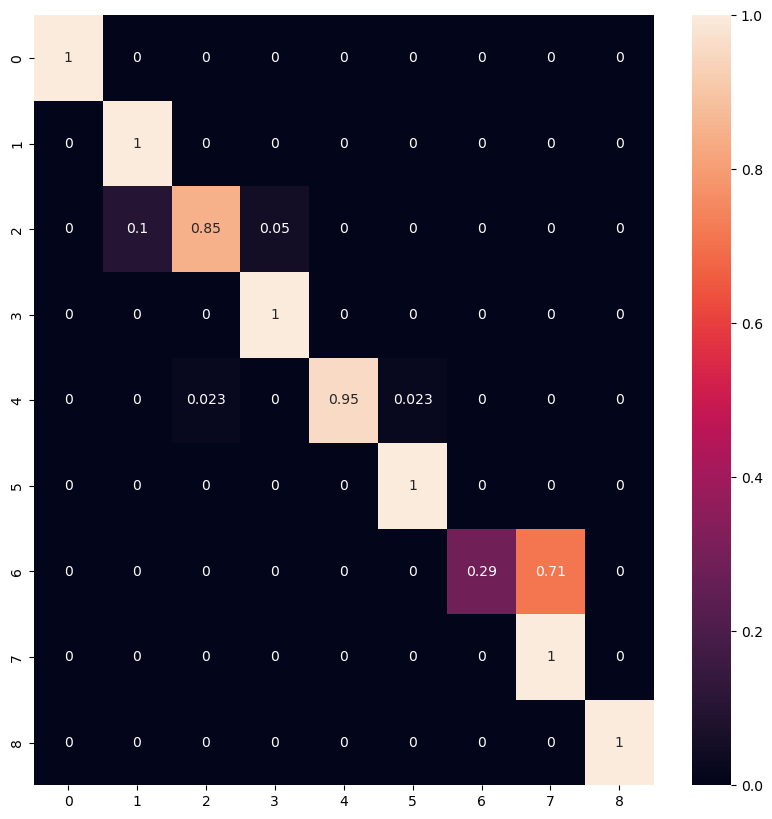

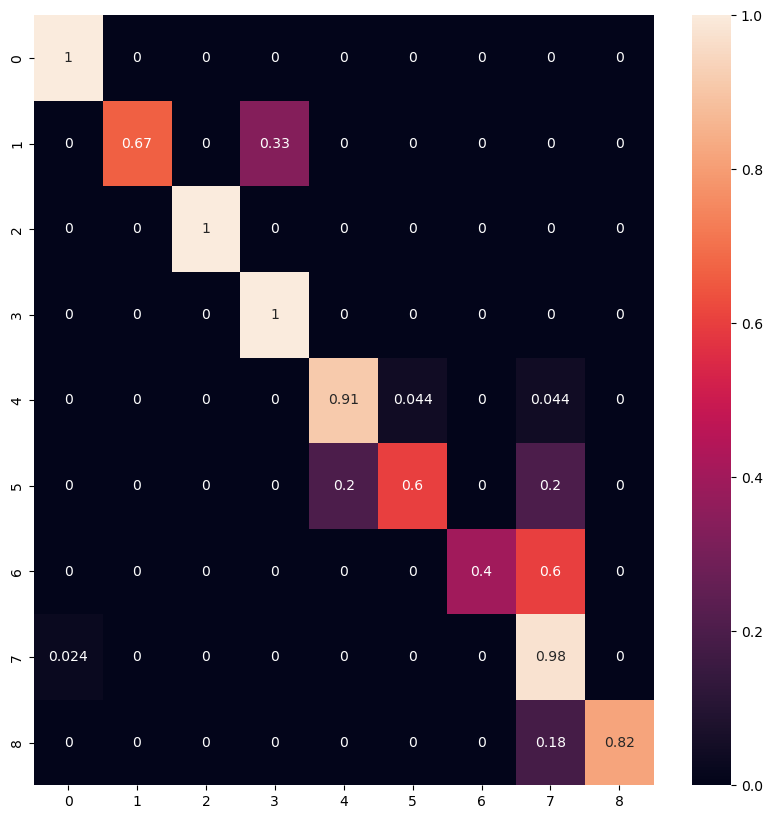

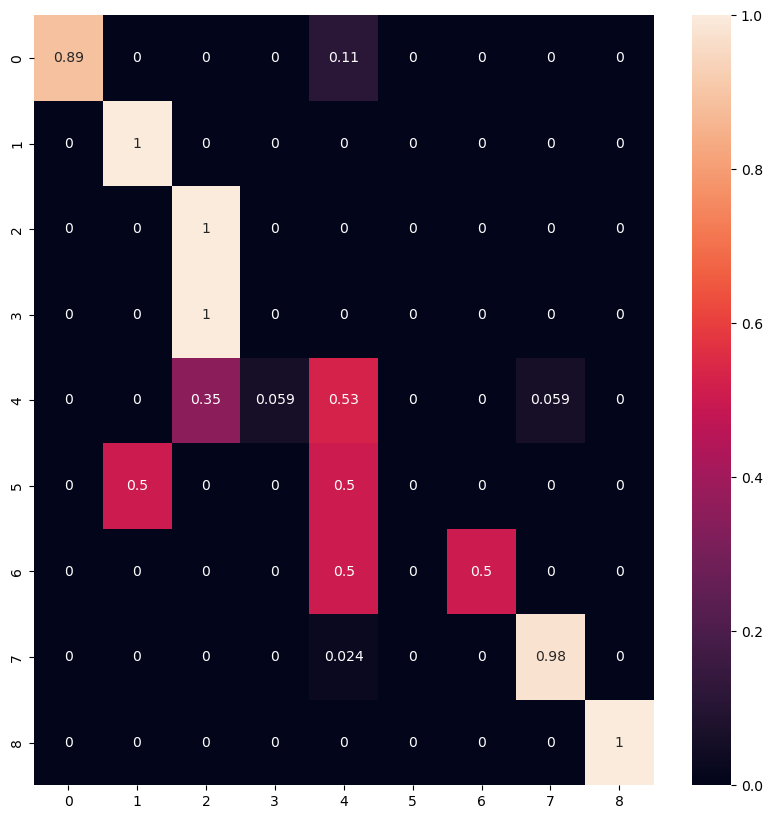

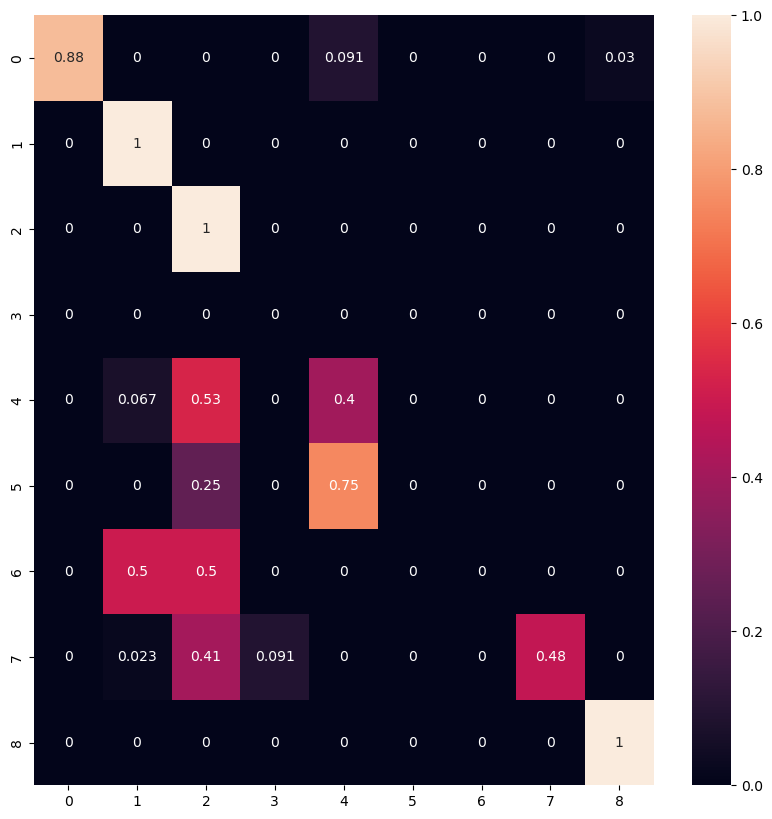

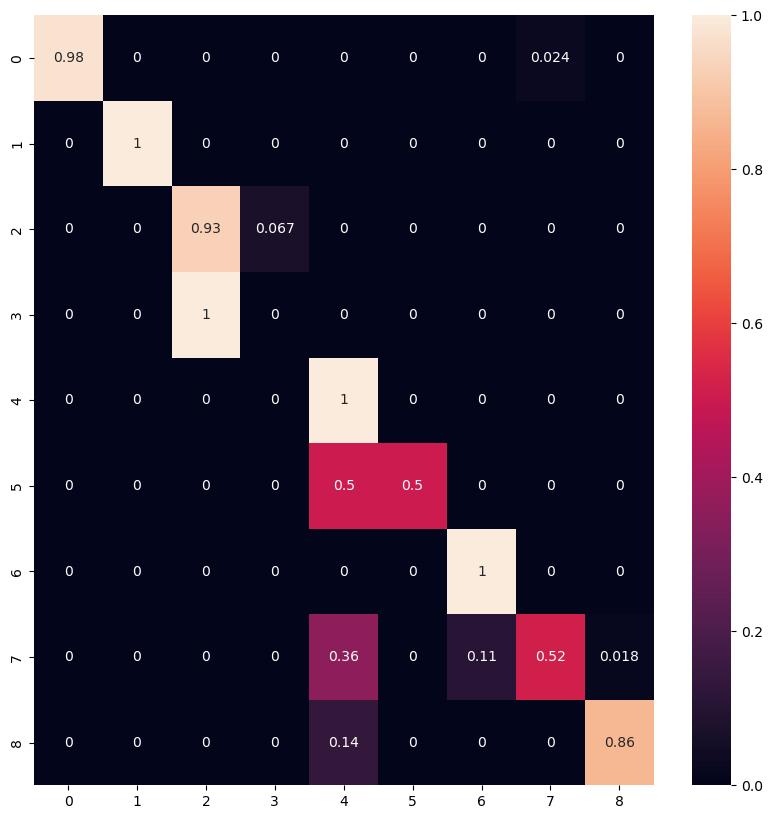

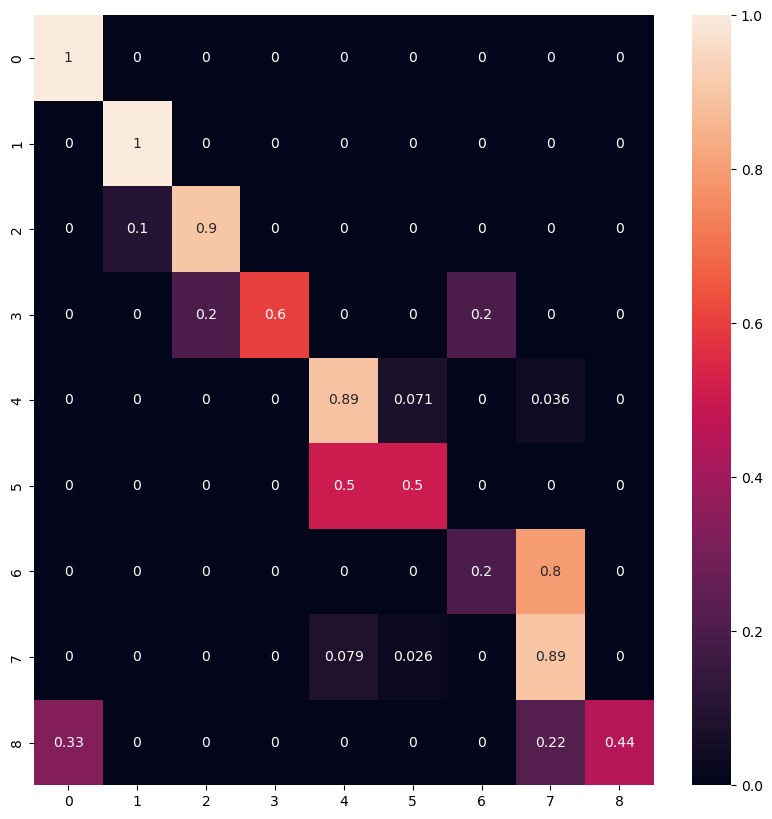

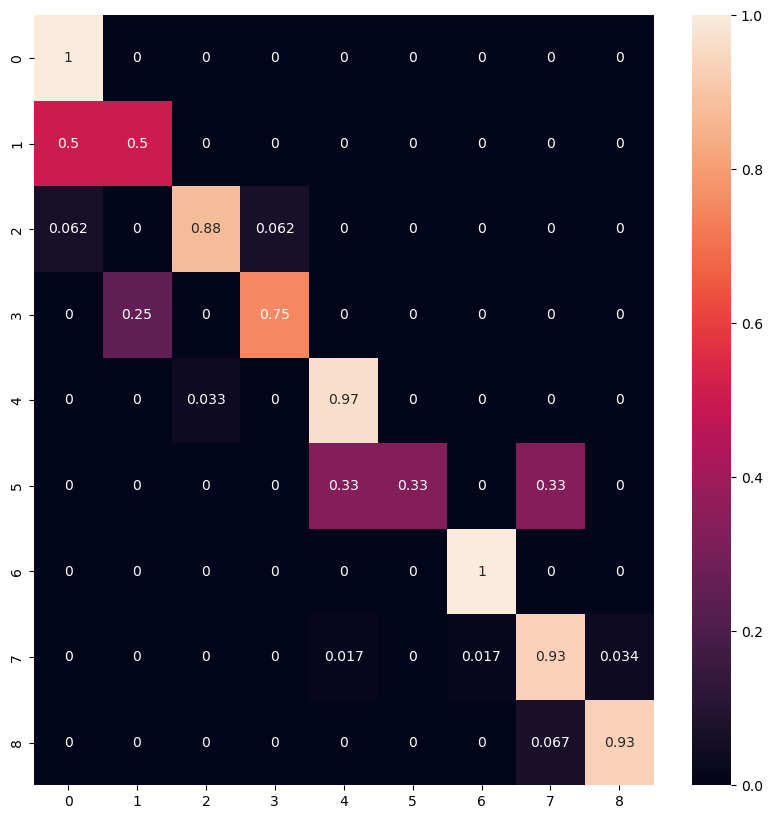

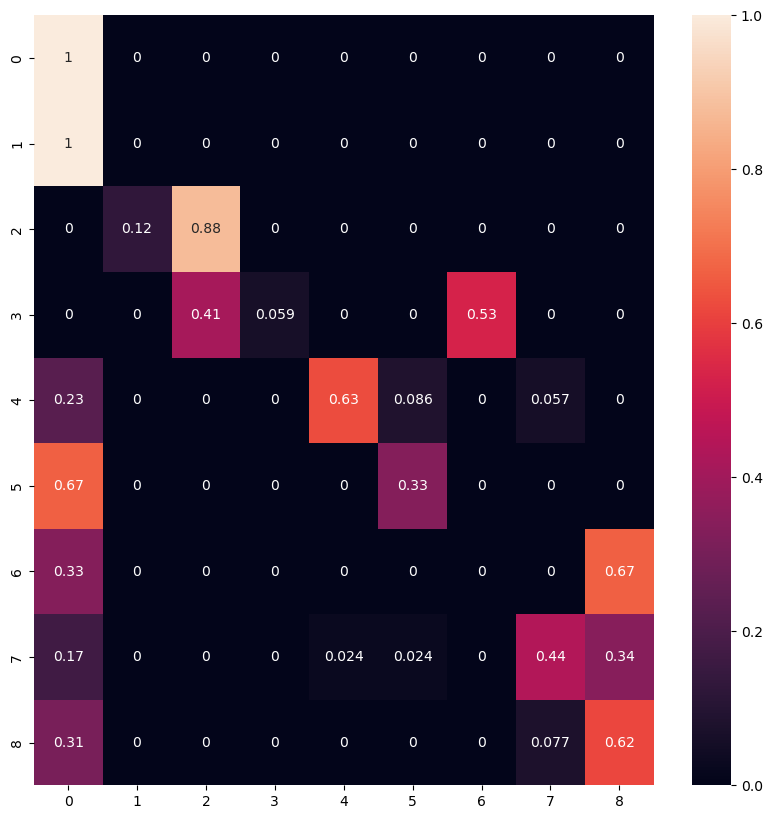

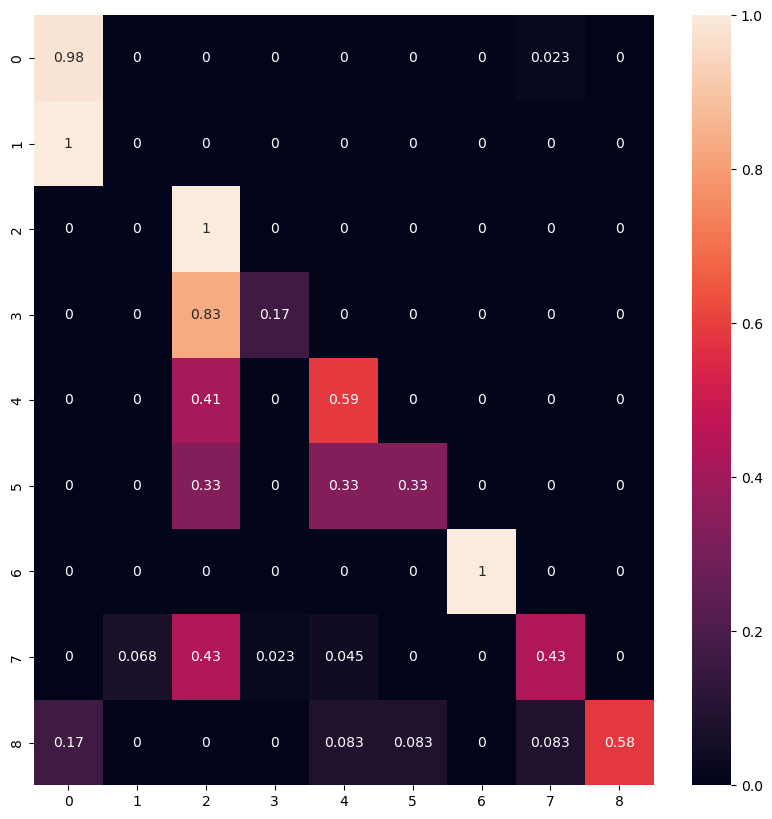

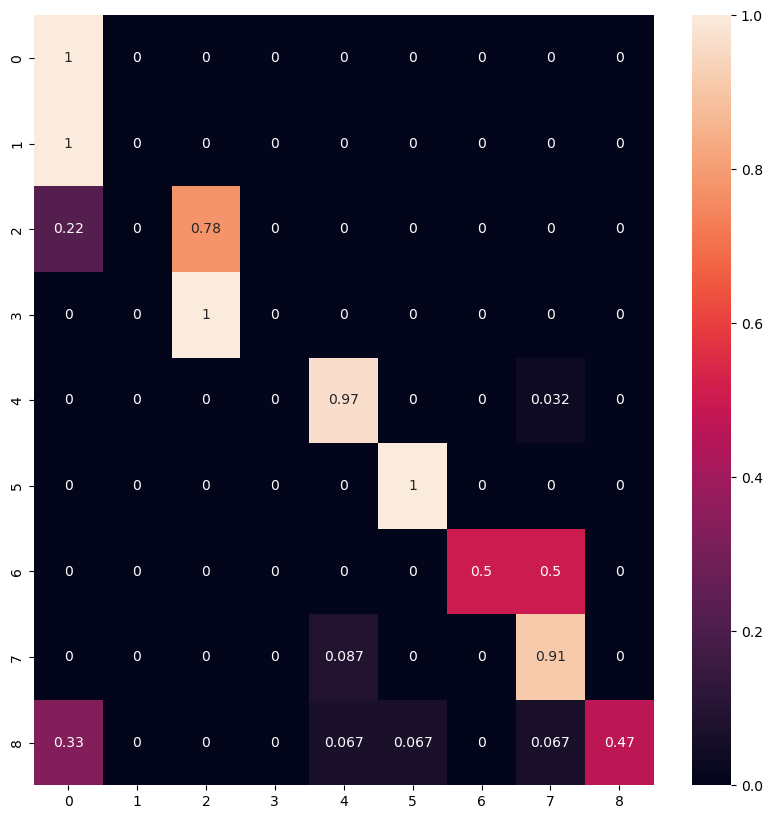

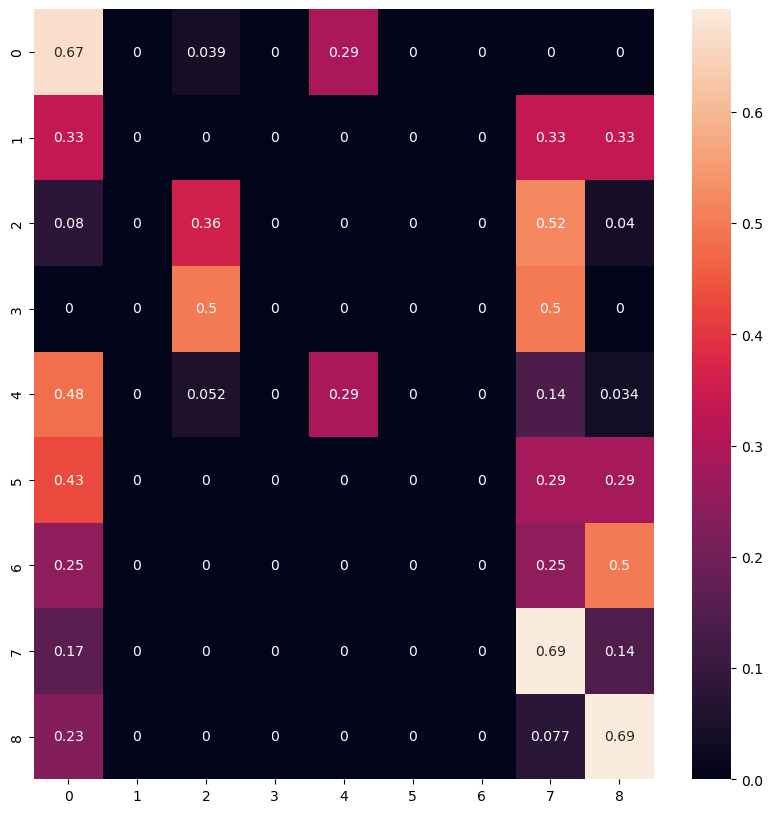

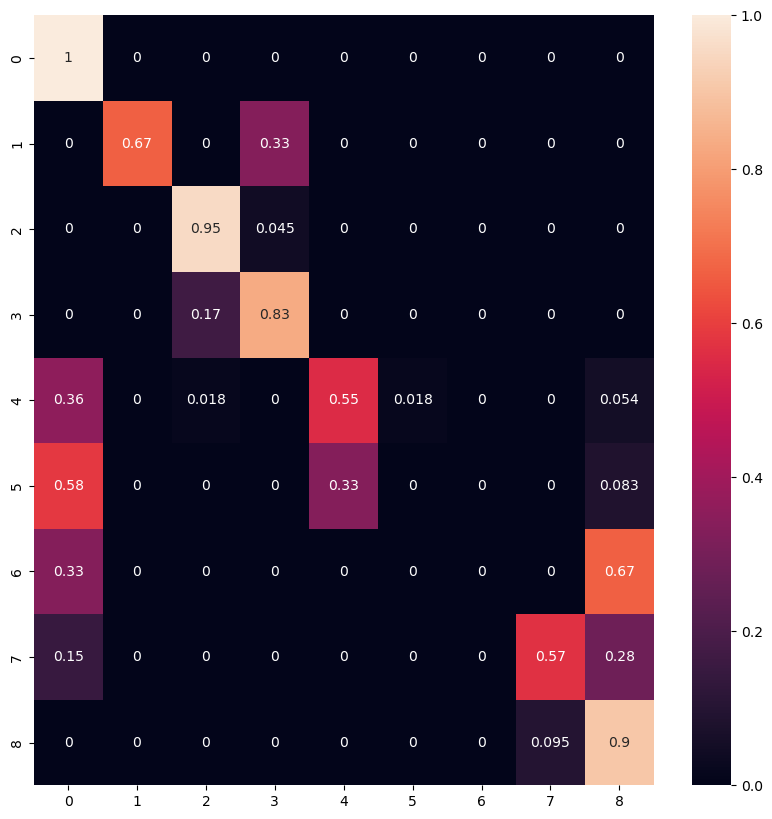

In [88]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
out_xgb2=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb2(ID,out_xgb2)

out_df_xgb2=pd.DataFrame(out_xgb2,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb2.describe()

In [89]:
out_df_xgb2


,ID,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
0,S08T1,0.946237,0.942190,1.000000,0.500000,0.894737,0.923077,0.976190,0.888889,0.444444,0.931507,1.000000
1,S08T2,0.932642,0.930053,0.992000,0.800000,1.000000,0.857143,0.942529,0.600000,0.571429,0.898876,0.900000
2,N11T1,0.843478,0.840769,0.941176,0.800000,0.600000,NaN,0.545455,NaN,0.666667,0.975610,1.000000
3,N11T2,0.628319,0.667651,0.935484,0.571429,0.300000,NaN,0.444444,NaN,NaN,0.646154,0.933333
4,N06T1,0.802326,0.804006,0.987952,1.000000,0.933333,NaN,0.684211,0.666667,0.666667,0.674419,0.904762
5,S02T2,0.828025,0.813604,0.938776,0.666667,0.900000,0.750000,0.847458,0.500000,0.285714,0.839506,0.615385
6,N06T2,0.932203,0.929574,0.976744,0.500000,0.903226,0.750000,0.950820,0.500000,0.923077,0.948276,0.903226
7,S02T1,0.645161,0.628196,0.823529,NaN,0.756757,0.111111,0.758621,0.250000,NaN,0.580645,0.432432
8,N02T2,0.657895,0.687586,0.945055,NaN,0.327273,0.250000,0.680000,0.400000,1.000000,0.584615,0.736842
9,N02T1,0.879747,0.865238,0.924528,NaN,0.823529,NaN,0.909091,0.800000,0.666667,0.913043,0.636364


In [109]:
def output_xgb4(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
    X_test=X_test.loc[:,a]
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    pred1=pred.copy()
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test_2_turn=test['second_turn'].to_list()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]
    buffer=False
    if (test['label1'][0].item()>0) or (test['label1'][1].item()>0) or (test['label1'][2].item()>0): 
        count=2
        buffer=True
    else: 
        count=1
#     print(ID)
#     print(list(test['label1']))
    buffer0=False
    buffer7=False
    buffer=True
    for i in range(len(turn)):
        
        if (list(test['label1'])[i]<5):
            try:
                if (turn[i]<-5):
                    if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):

                        count-=1
            except: pass
#             if (list(test['label1'])[i]==0):
#                 if (list(test['label1'])[i-1]>6):
#                     if (turn[i]<-3):
#                         count-=1
#                         buffer=False
        else:
#             if ID[:5]=='N02T2':
#                     print(turn[i])
#                     print(list(test['label1'])[i])
            if (turn[i]<-4):
                count-=1
#                 if ID[:5]=='N02T2':
#                     print(count)
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                buffer0=True
            if (list(test['label1'])[i]==7)&(list(test['label1'])[i+1]==7):
                buffer7=True
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0)&(buffer7==True)&(buffer0==True)&(buffer==True):
                    count-=1
                    buffer=False
        except: pass
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after00=[]
    for i in range(len(test['label1'])):
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                after0-=1
            if ((list(test['second_turn'])[i]>0) and sturn==True):
                after0=fturn_test()
                sturn=False
            if after0<=0:
        #         print(after0)
                after00.append(1) 
            else:
                after00.append(0)
        except: after00.append(0)
    test['after00']=after00
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):
        if (list(test['after00'])[i]==1):
            if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['after1'])[i]==1):
            if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4

    test=test.drop(['second_turn','turn','after00'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    X_test_a=X_test_a.loc[:,b]
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s/smote_xgb_model_after.sav'
    HGBC=joblib.load( filename)
    pred_xgb_gan=HGBC.predict_proba(X_test_a)
    filename = './model_windowsize3_with_pre_feat3s/smote_xgb_model_after.sav'
    HGBC=joblib.load( filename)
    pred_xgb_nogan=HGBC.predict_proba(X_test_a)
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred_HGBC_gan=HGBC.predict_proba(X_test_a)
    suma=np.add(pred_xgb_gan,pred_xgb_nogan,pred_HGBC_gan)
    pred=np.argmax(suma,axis=1)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0


,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,8.000000,12.000000,9.000000,12.000000,8.000000,8.000000,12.000000,12.000000
mean,0.807089,0.804307,0.912271,0.645833,0.804311,0.648860,0.816187,0.589097,0.617737,0.783404,0.740295
std,0.126023,0.124878,0.092395,0.242956,0.164725,0.255455,0.154770,0.194948,0.250944,0.220654,0.235497
min,0.577558,0.581389,0.663462,0.333333,0.461538,0.166667,0.428571,0.181818,0.250000,0.328358,0.400000
25%,0.718135,0.711111,0.909414,0.500000,0.706667,0.500000,0.742258,0.526738,0.511905,0.687875,0.501880
50%,0.870831,0.867797,0.943924,0.583333,0.869328,0.666667,0.861237,0.649123,0.615789,0.900658,0.850794
75%,0.902253,0.893556,0.963795,0.750000,0.925641,0.800000,0.926509,0.687500,0.722222,0.928127,0.935559
max,0.943038,0.938452,1.000000,1.000000,0.954545,1.000000,0.953488,0.800000,1.000000,0.987952,1.000000


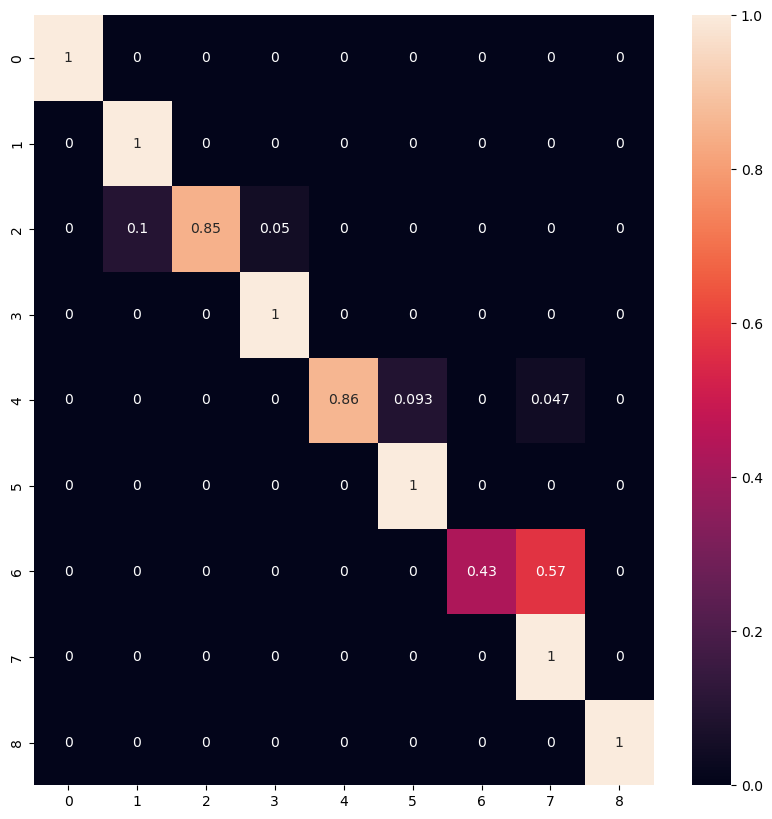

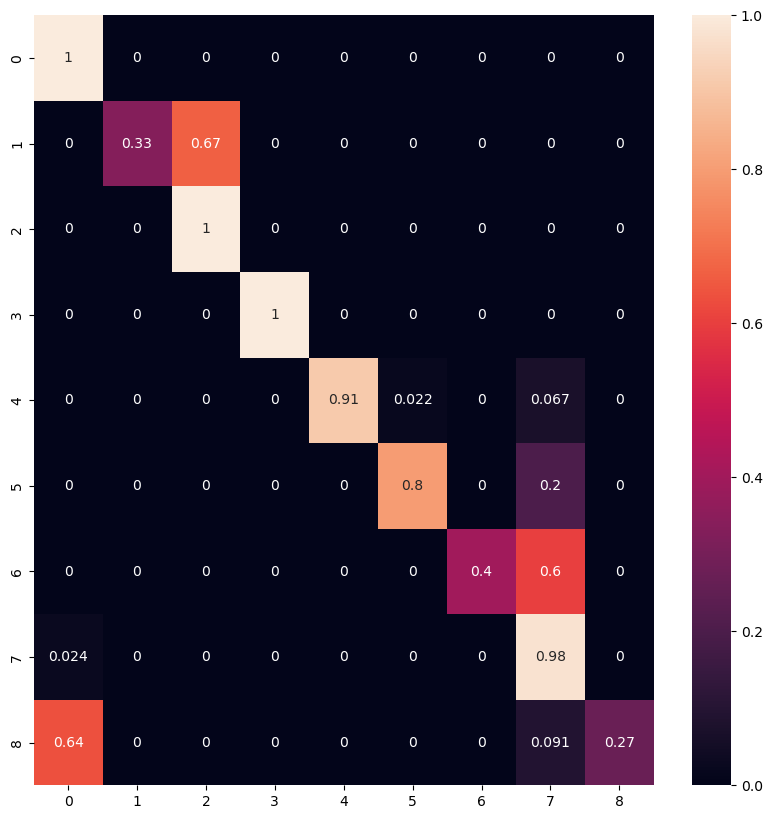

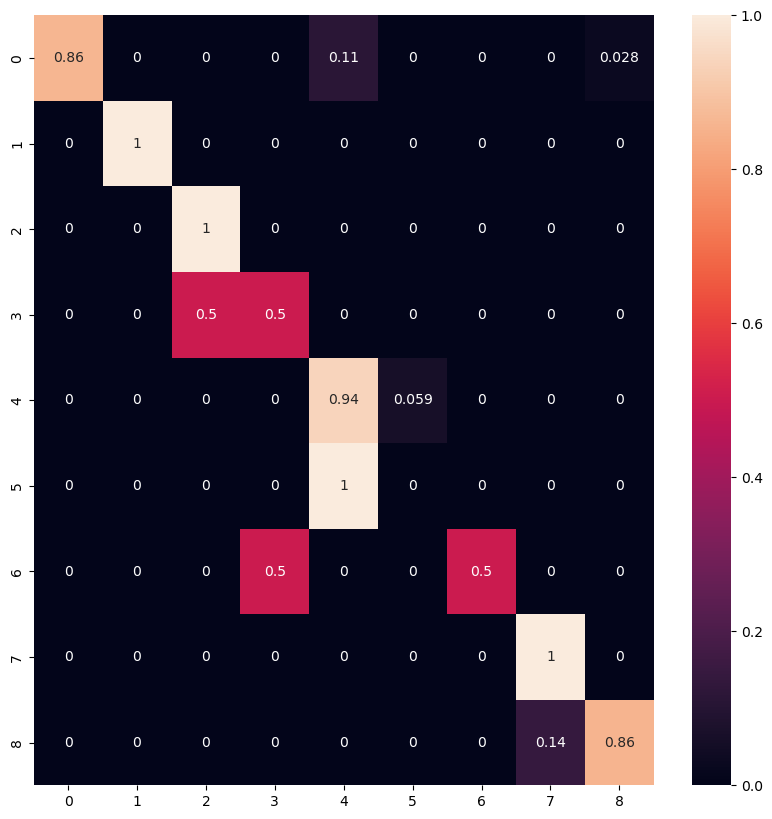

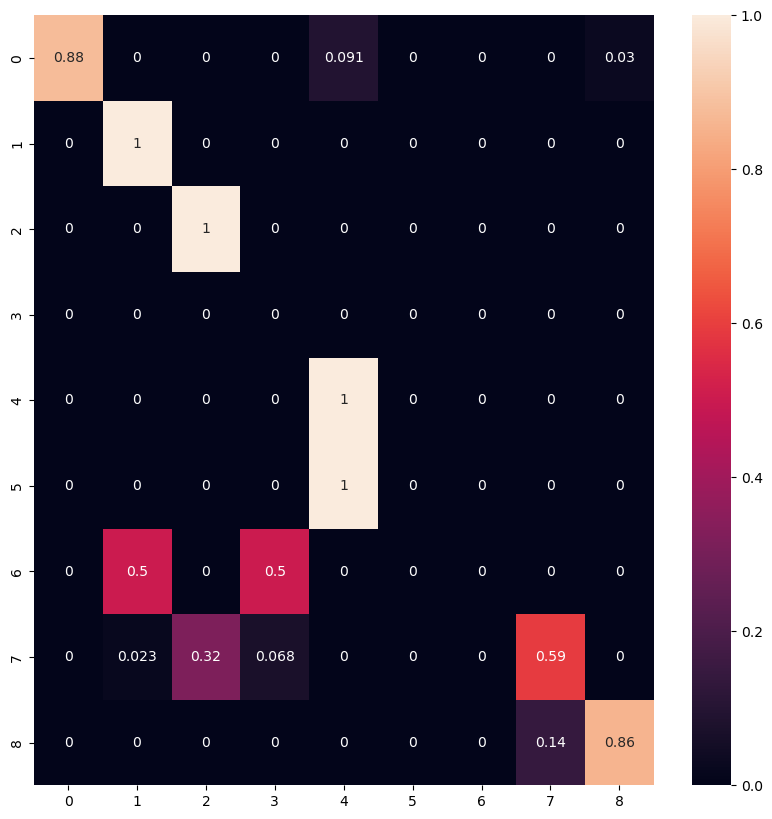

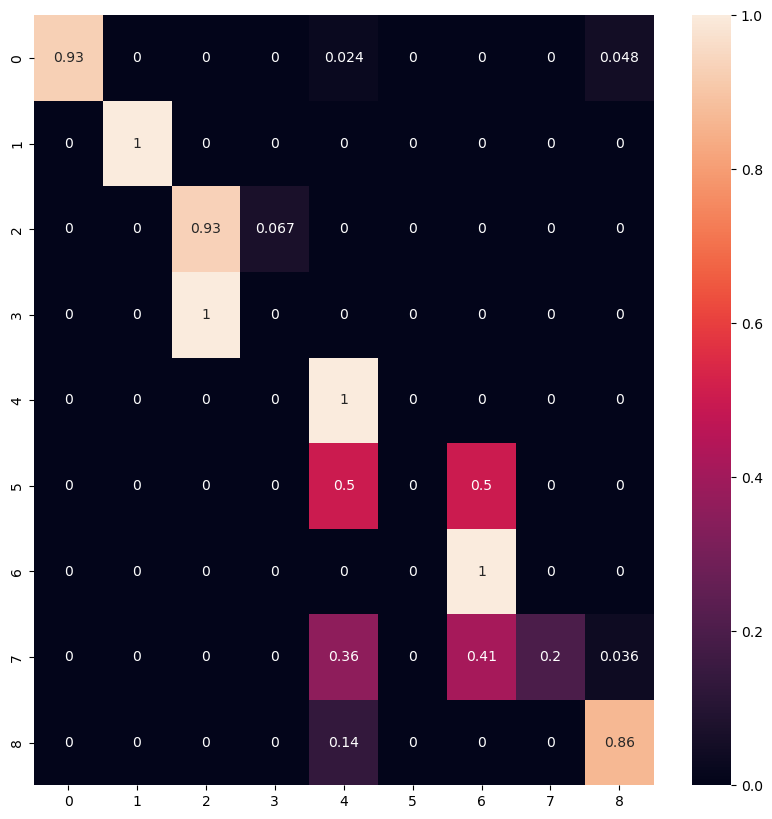

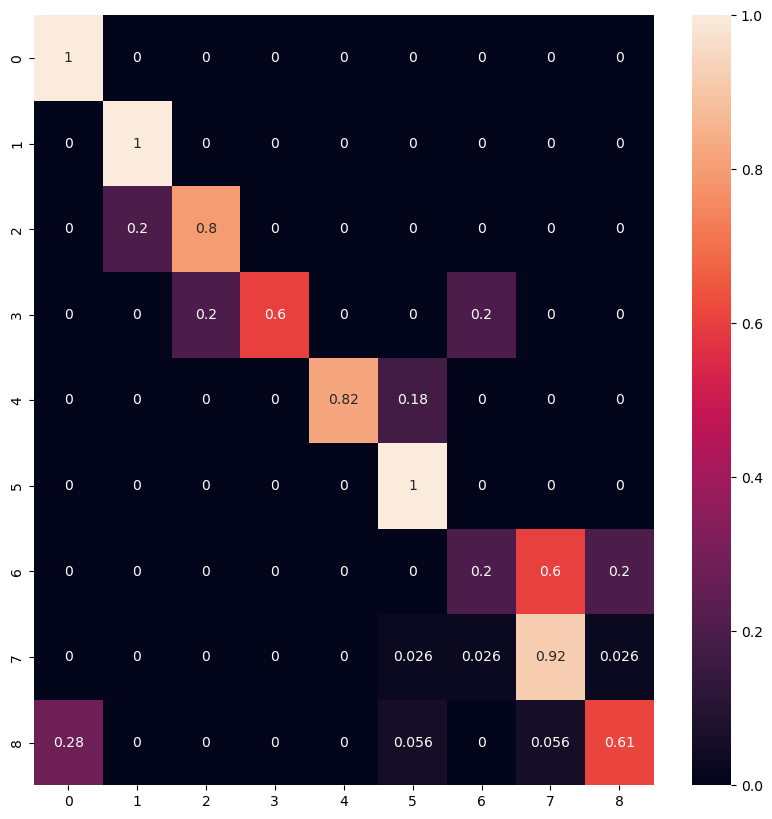

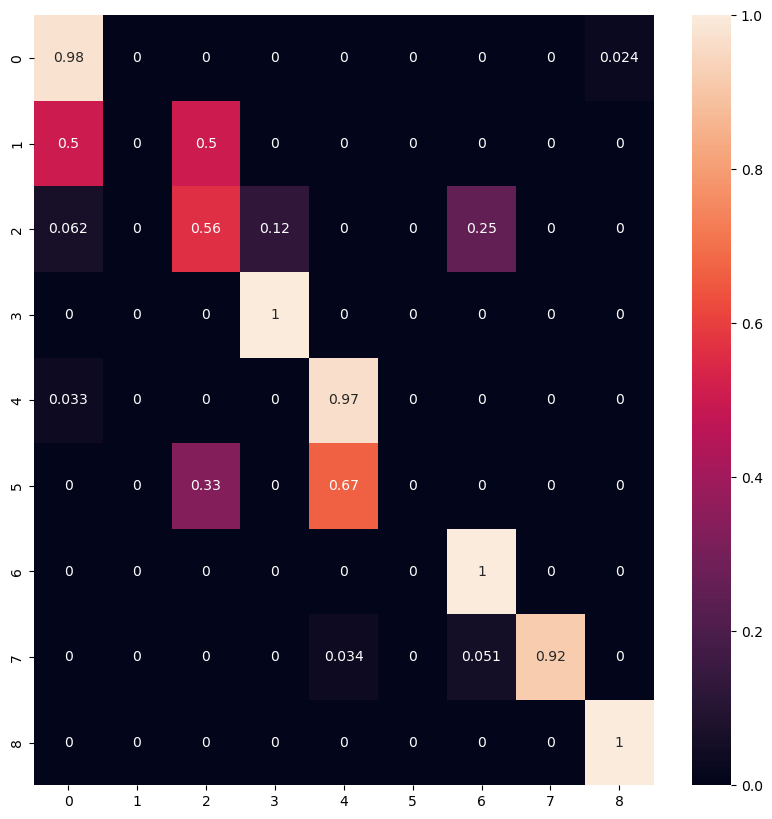

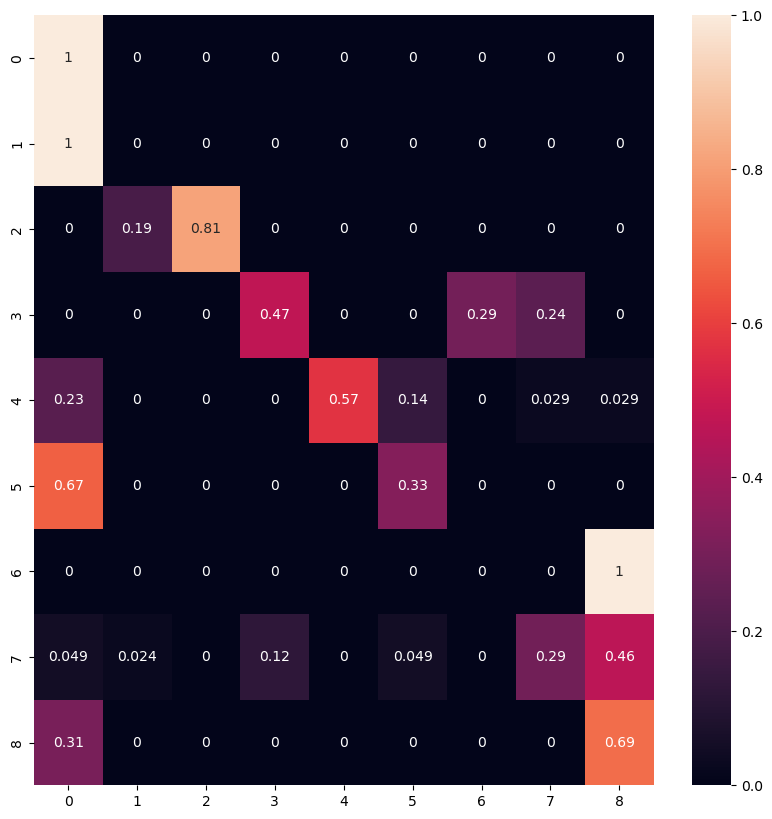

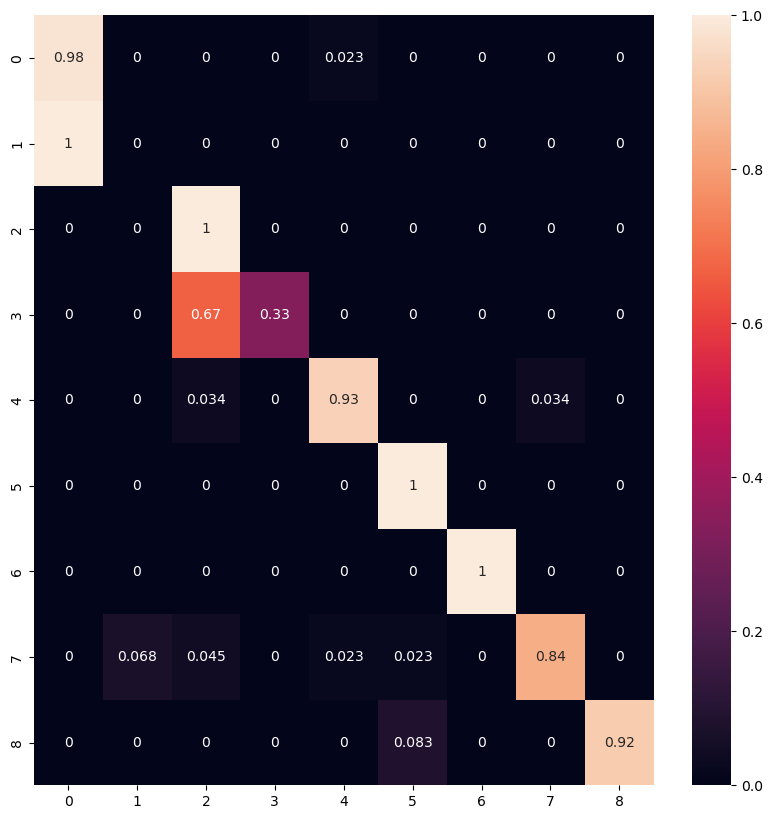

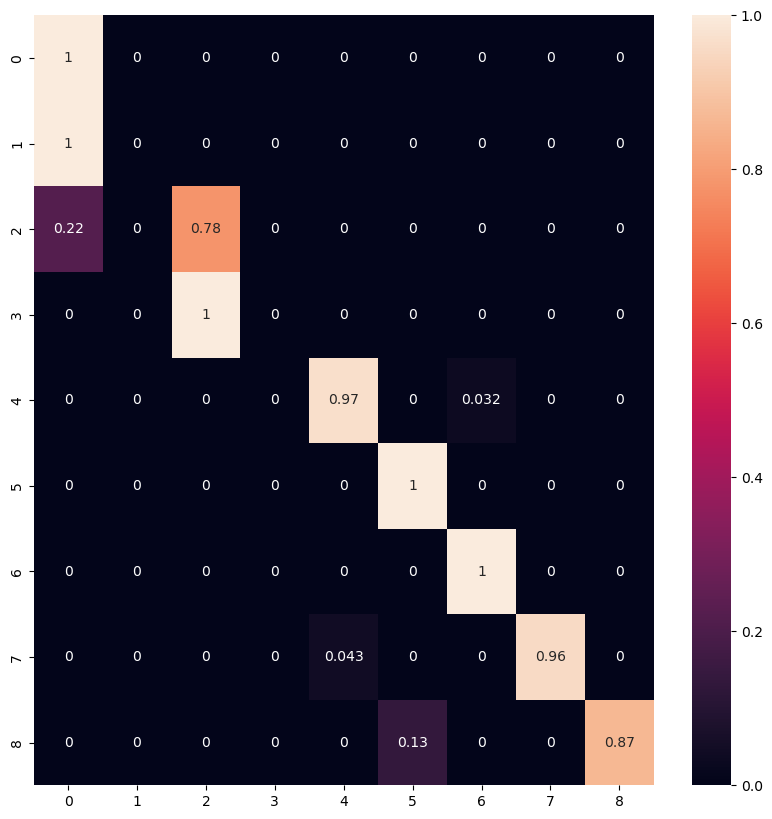

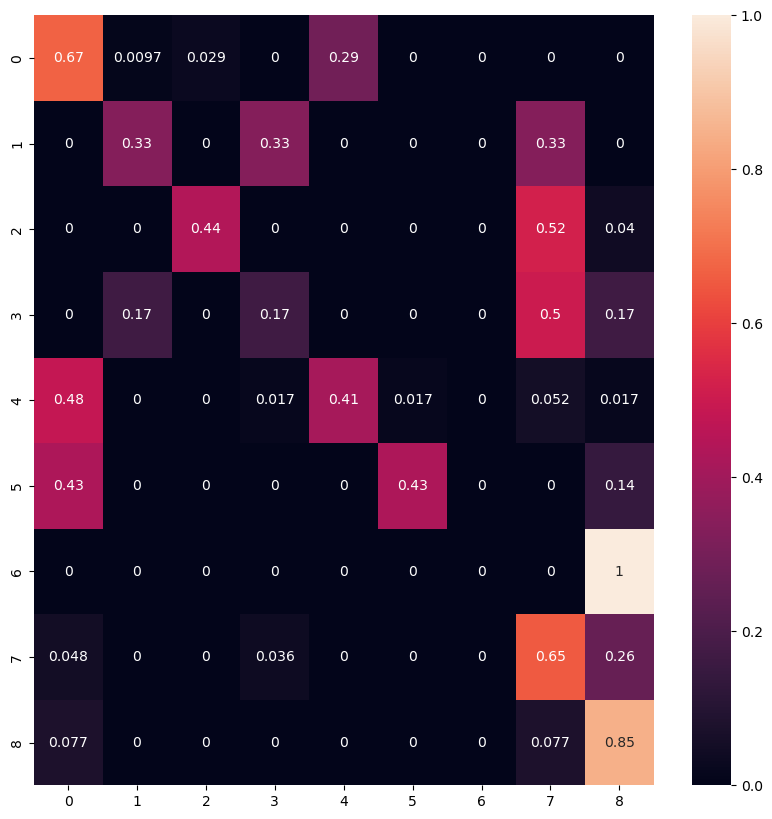

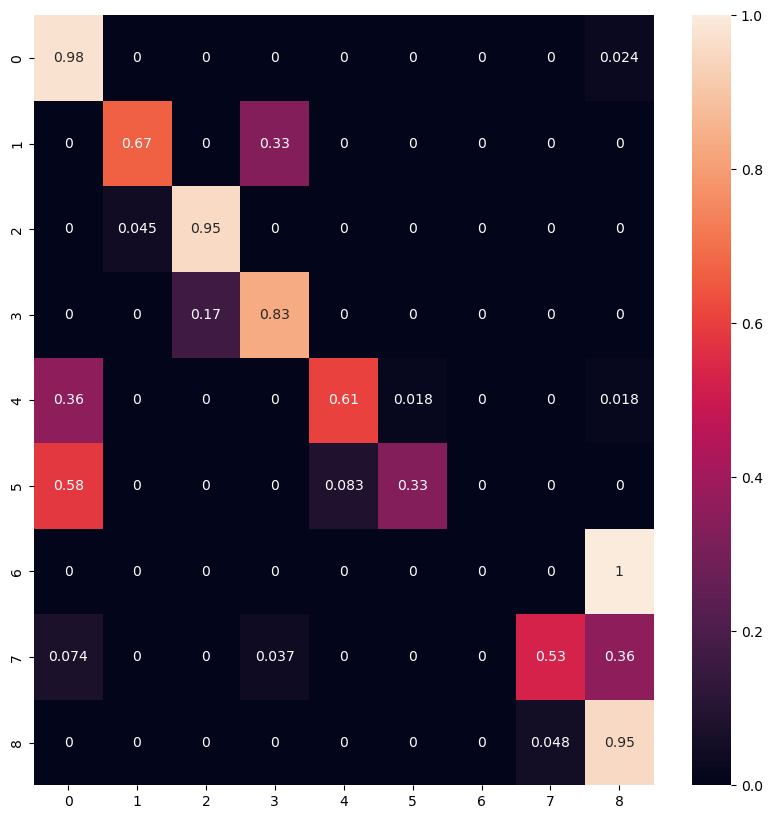

In [110]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
out_xgb4=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb4(ID,out_xgb4)

out_df_xgb4=pd.DataFrame(out_xgb4,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb4.describe()

In [106]:
out_df_xgb4

,ID,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
0,S08T1,0.930108,0.931730,1.000000,0.500000,0.918919,0.923077,0.925000,0.666667,0.600000,0.918919,1.000000
1,S08T2,0.901554,0.886670,0.939394,0.500000,0.947368,1.000000,0.953488,0.800000,0.571429,0.898876,0.428571
2,N11T1,0.904348,0.901217,0.925373,1.000000,0.923077,0.500000,0.820513,NaN,0.666667,0.987952,0.857143
3,N11T2,0.743363,0.755407,0.935484,0.666667,0.461538,NaN,0.810811,NaN,NaN,0.732394,0.857143
4,N06T1,0.680233,0.656795,0.962963,1.000000,0.933333,NaN,0.675325,NaN,0.333333,0.328358,0.844444
5,S02T2,0.853503,0.852955,0.948454,0.500000,0.842105,0.750000,0.901961,0.631579,0.250000,0.909091,0.709677
6,N06T2,0.892655,0.882640,0.953488,NaN,0.666667,0.800000,0.920635,NaN,0.631579,0.955752,0.967742
7,S02T1,0.639785,0.644211,0.861538,NaN,0.896552,0.533333,0.727273,0.181818,NaN,0.413793,0.400000
8,N02T2,0.888158,0.891003,0.966292,NaN,0.720000,0.500000,0.931034,0.750000,1.000000,0.902439,0.956522
9,N02T1,0.943038,0.938452,0.970297,NaN,0.823529,NaN,0.952381,0.666667,0.888889,0.977778,0.928571


In [85]:
def output_xgb3(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
    X_test=X_test.loc[:,a]
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     pred1=pred.copy()
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test_2_turn=test['second_turn'].to_list()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]
#     buffer=False
#     if (test['label1'][0].item()>0) or (test['label1'][1].item()>0) or (test['label1'][2].item()>0): 
#         count=2
#         buffer=True
#     else: 
#         count=1
# #     print(ID)
# #     print(list(test['label1']))
#     buffer0=False
#     buffer7=False
#     buffer=True
#     for i in range(len(turn)):
        
#         if (list(test['label1'])[i]<5):
#             try:
#                 if (turn[i]<-5):
#                     if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):

#                         count-=1
#             except: pass
# #             if (list(test['label1'])[i]==0):
# #                 if (list(test['label1'])[i-1]>6):
# #                     if (turn[i]<-3):
# #                         count-=1
# #                         buffer=False
#         else:
# #             if ID[:5]=='N02T2':
# #                     print(turn[i])
# #                     print(list(test['label1'])[i])
#             if (turn[i]<-4):
#                 count-=1
# #                 if ID[:5]=='N02T2':
# #                     print(count)
#         try:
#             if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
#                 buffer0=True
#             if (list(test['label1'])[i]==7)&(list(test['label1'])[i+1]==7):
#                 buffer7=True
#             if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0)&(buffer7==True)&(buffer0==True)&(buffer==True):
#                     count-=1
#                     buffer=False
#         except: pass
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label1'])[0])
#     def fturn_test():
#         if list(test['label1'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after00=[]
#     for i in range(len(test['label1'])):
#         try:
#             if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
#                 after0-=1
#             if ((list(test['second_turn'])[i]>0) and sturn==True):
#                 after0=fturn_test()
#                 sturn=False
#             if after0<=0:
#         #         print(after0)
#                 after00.append(1) 
#             else:
#                 after00.append(0)
#         except: after00.append(0)
#     test['after00']=after00
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label1'])):
#         if (list(test['after00'])[i]==1):
#             if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
#                 after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label1'])):
#         if (list(test['after1'])[i]==1):
#             if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
#                 after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4

#     test=test.drop(['second_turn','turn','after00'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     X_test_a=X_test_a.loc[:,b]
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,8.000000,12.000000,7.000000,12.000000,9.000000,10.000000,12.000000,12.000000
mean,0.752393,0.738410,0.746835,0.658333,0.756087,0.606153,0.612720,0.519027,0.627228,0.850899,0.815834
std,0.093668,0.101861,0.177032,0.191693,0.167037,0.250877,0.227203,0.222235,0.207210,0.079199,0.139944
min,0.557756,0.525882,0.373333,0.500000,0.413793,0.250000,0.263158,0.153846,0.333333,0.666667,0.538462
25%,0.706691,0.703115,0.680063,0.500000,0.660714,0.463203,0.405692,0.307692,0.500000,0.847403,0.742879
50%,0.765760,0.736529,0.794231,0.583333,0.800000,0.600000,0.684391,0.571429,0.619048,0.872679,0.805668
75%,0.815549,0.812243,0.873409,0.800000,0.881982,0.733333,0.781633,0.666667,0.666667,0.890047,0.934375
max,0.906736,0.903791,0.959350,1.000000,0.947368,1.000000,0.888889,0.769231,1.000000,0.932203,1.000000


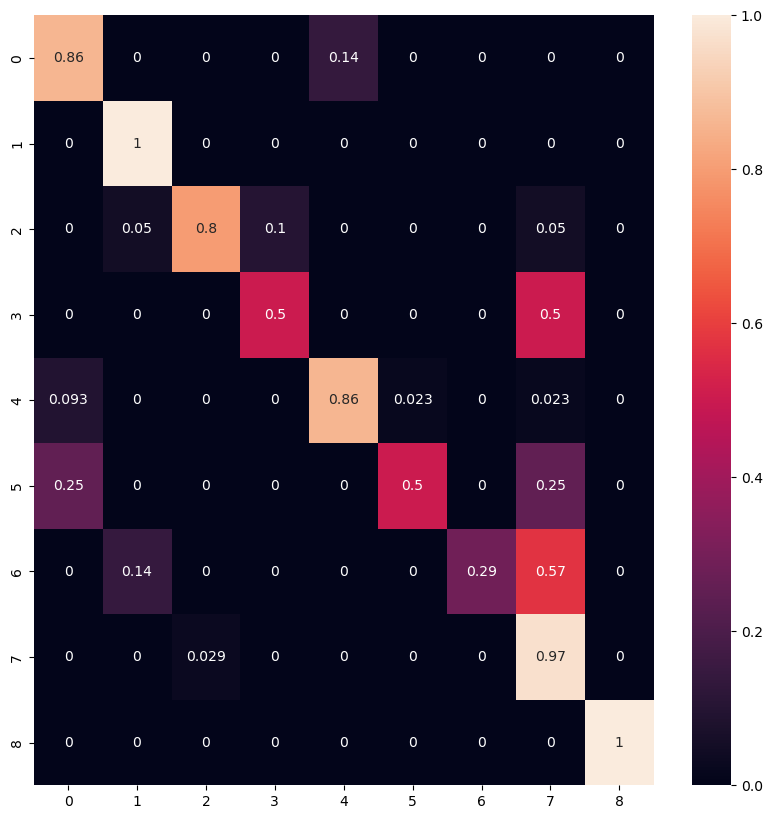

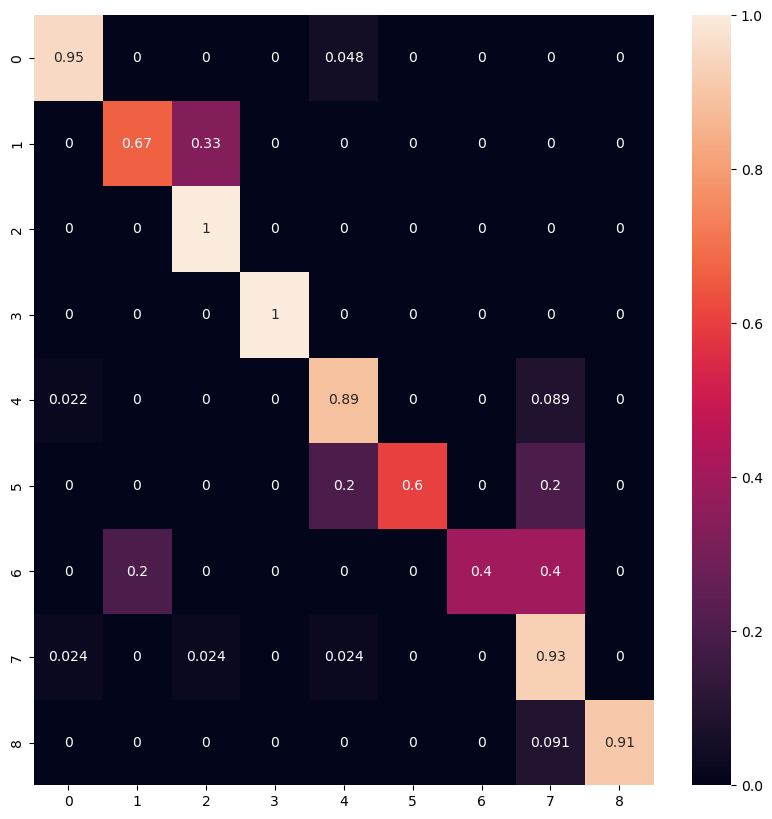

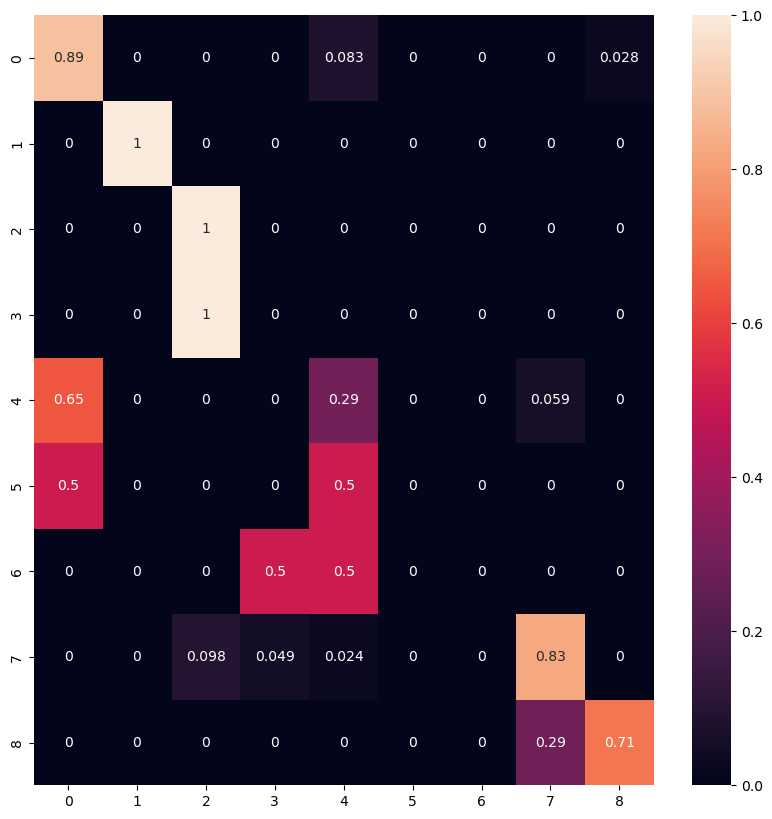

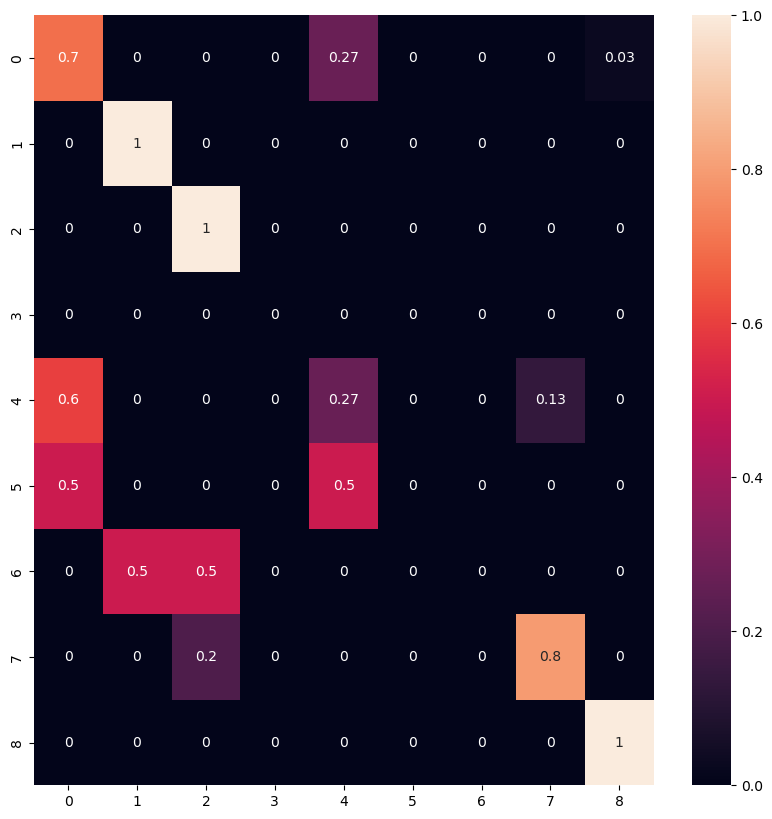

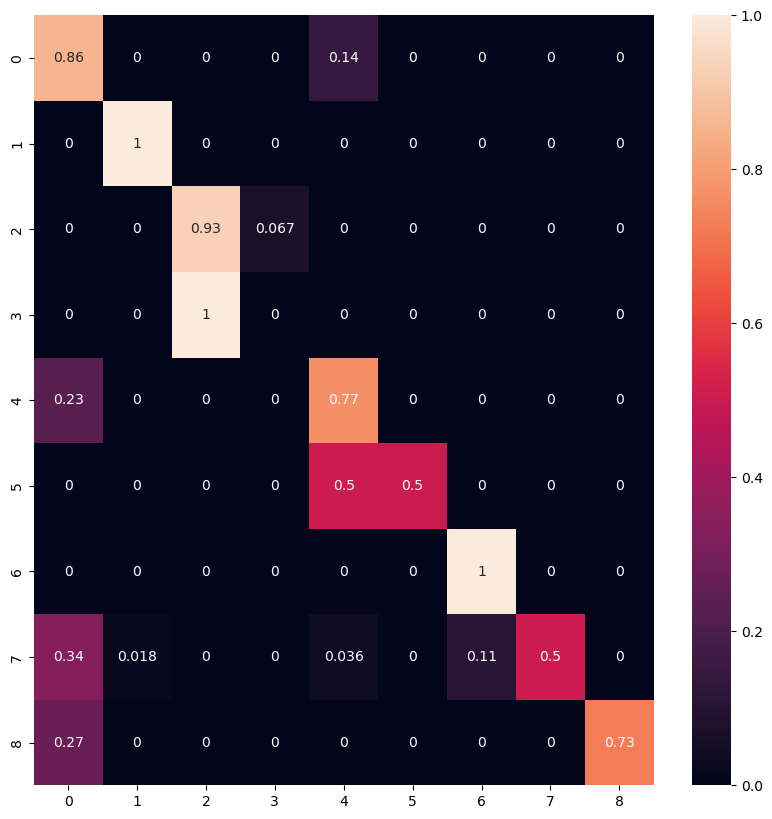

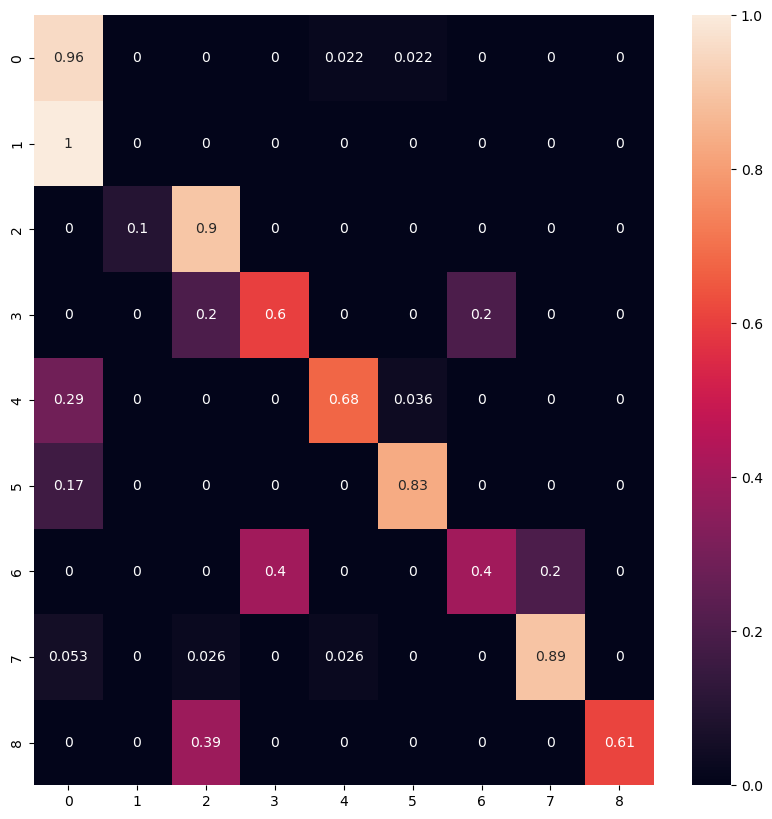

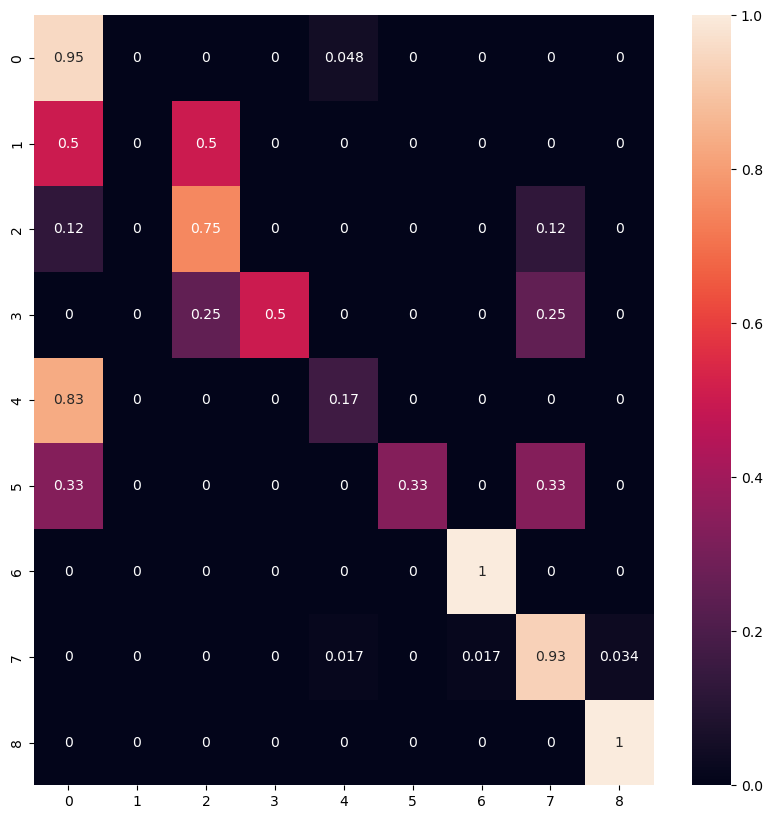

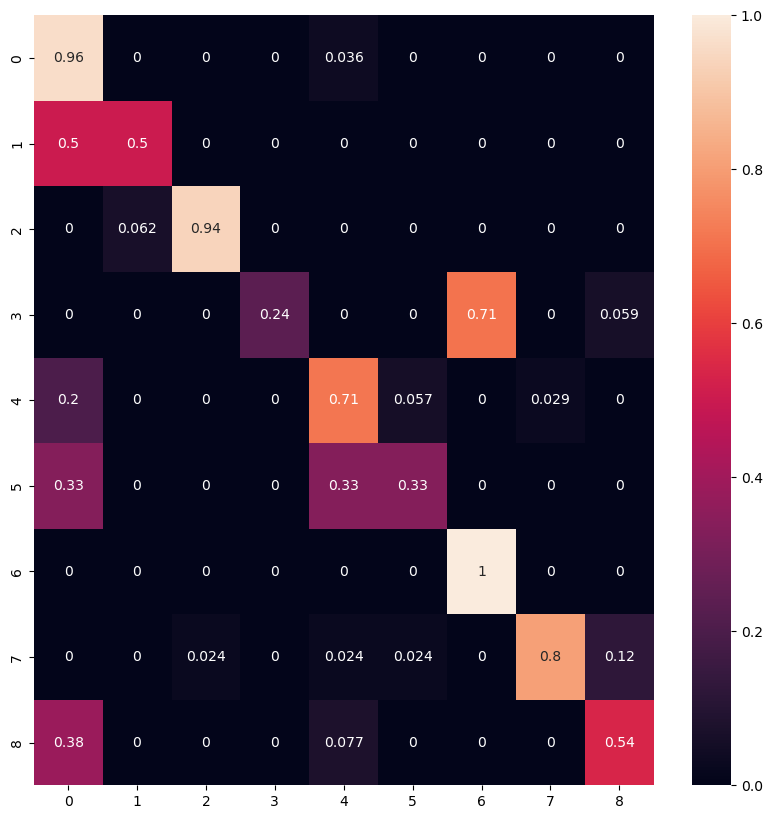

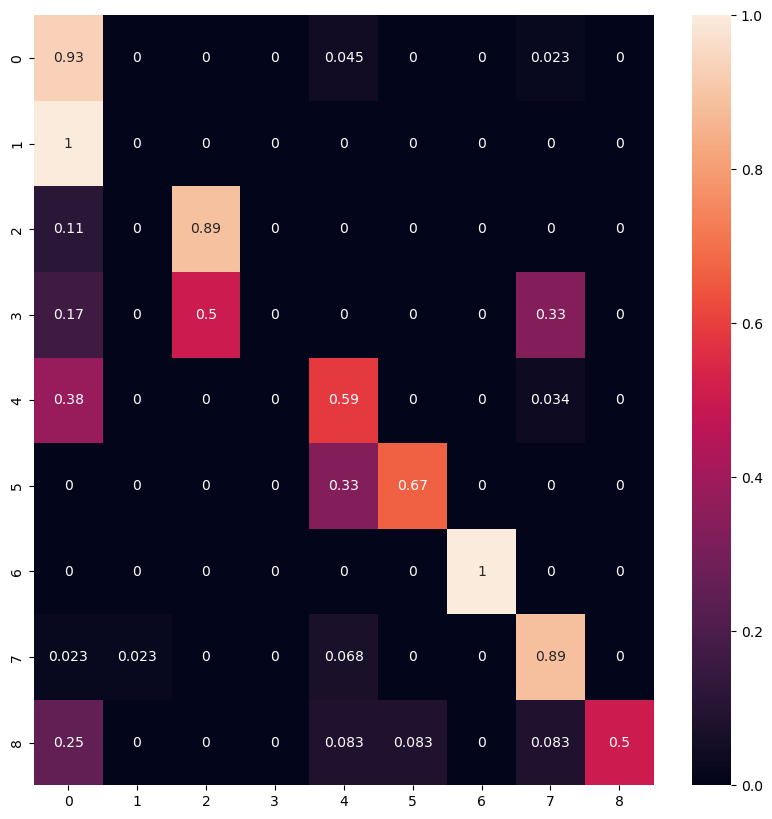

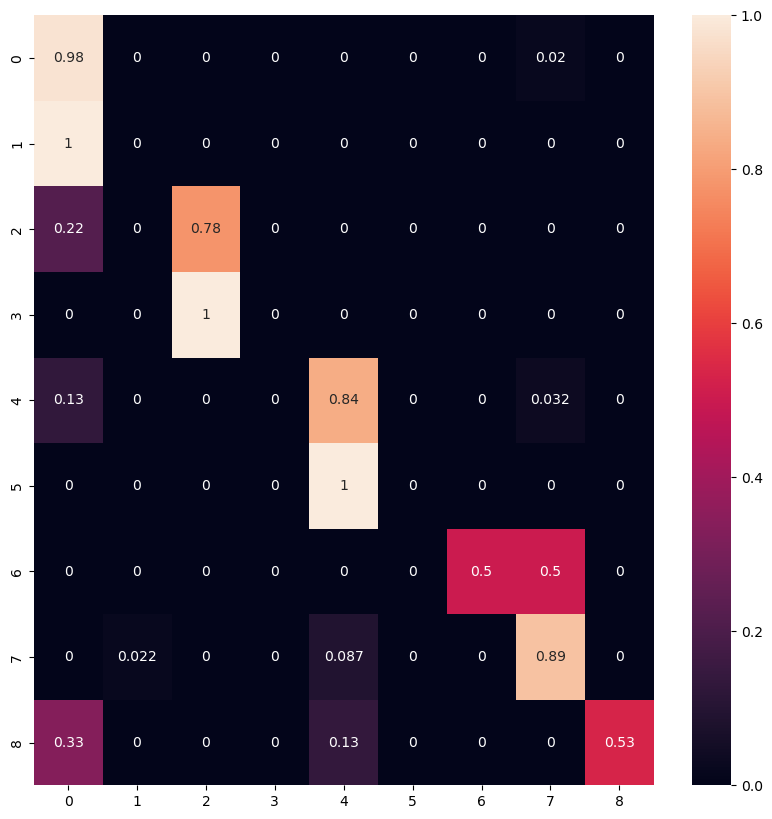

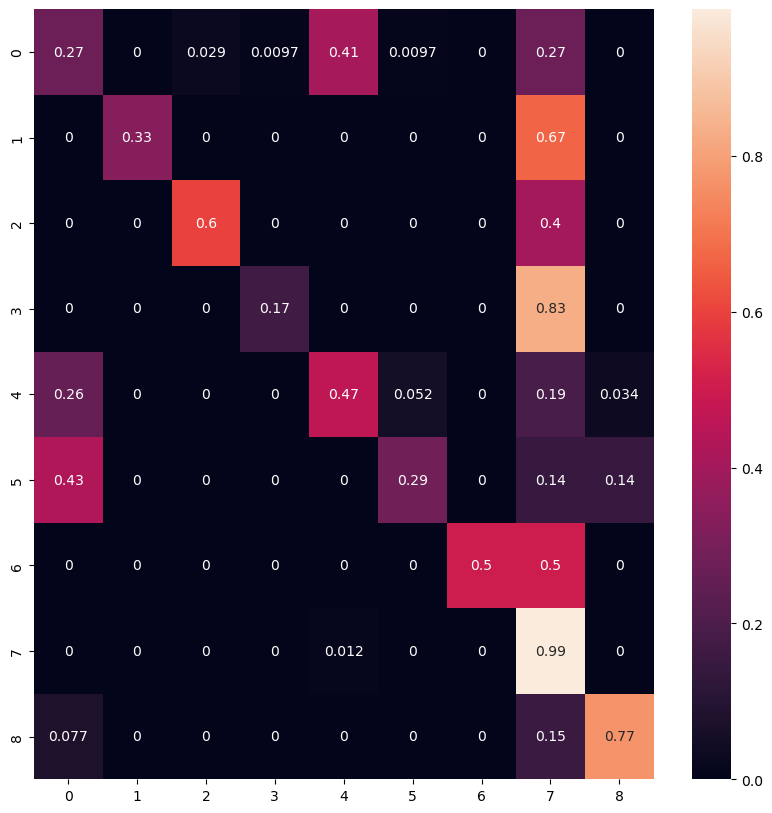

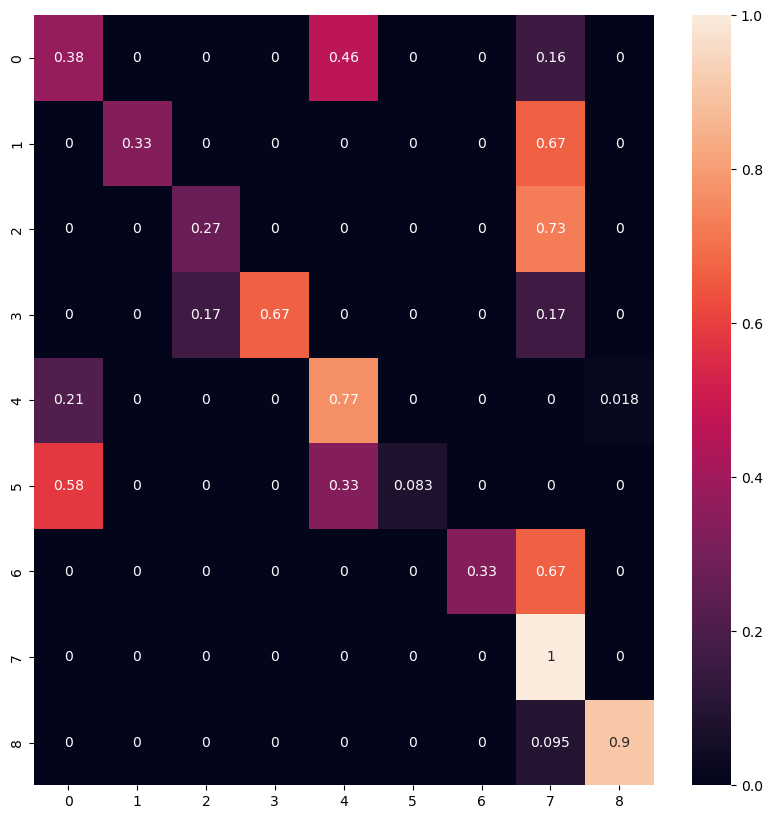

In [86]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
out_xgb3=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb3(ID,out_xgb3)

out_df_xgb3=pd.DataFrame(out_xgb3,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb3.describe()

In [71]:
# b=b+['label','previous_label']
# df_buf=pd.DataFrame(columns=b)
# df_buf.to_csv('columns2k.csv',index=False)

In [72]:
# def output_xgb(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]

#     if (test['label'][0].item()>0): 
#         count=2
#     else: 
#         count=1
#     for i in range(len(turn)):

#         if turn[i]<-3:
#             count-=1
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label'])[0])
#     def fturn_test():
#         if list(test['label'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label'])):

#         if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label'])):
#         if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4
#     test=test.drop(['second_turn','turn'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
    
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [73]:
test_set=os.listdir('./test_set_df')
test_set

['.DS_Store',
 'S08T1.csv',
 'S08T2.csv',
 'N11T1.csv',
 'N11T2.csv',
 'N06T1.csv',
 'S02T2.csv',
 'N06T2.csv',
 'S02T1.csv',
 'N02T2.csv',
 'N02T1.csv',
 'S03T1.csv',
 'S03T2.csv']

In [74]:
def output_rf(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    pred1=pred.copy()
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test_2_turn=test['second_turn'].to_list()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]
    buffer=False
    if (test['label1'][0].item()>0) or (test['label1'][2].item()>0) or (test['label1'][3].item()>0): 
        count=2
        buffer=True
    else: 
        count=1
#     print(ID)
#     print(list(test['label1']))
    for i in range(len(turn)):
        
        if (list(test['label1'])[i]<5):
            if (turn[i]<-5):
                count-=1
            if (list(test['label1'])[i]==0):
                if (list(test['label1'])[i-1]>6):
                    if (turn[i]<-3):
                        count-=1
                        buffer=False
        else:
#             if ID[:5]=='N02T2':
#                     print(turn[i])
#                     print(list(test['label1'])[i])
            if (turn[i]<-4):
                count-=1
#                 if ID[:5]=='N02T2':
#                     print(count)
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after00=[]
    for i in range(len(test['label1'])):
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                after0-=1
            if ((list(test['second_turn'])[i]>0) and sturn==True):
                after0=fturn_test()
                sturn=False
            if after0<=0:
        #         print(after0)
                after00.append(1) 
            else:
                after00.append(0)
        except: after00.append(0)
    test['after00']=after00
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):
        if (list(test['after00'])[i]==1):
            if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['after1'])[i]==1):
            if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4

    test=test.drop(['second_turn','turn','after00'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [75]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
# out_rf=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_rf(ID,out_rf)
# out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])

# out_df.describe()

In [76]:
def output_xgb_2(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label1'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):

        if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [77]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
# out_xgb2=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_rf(ID,out_xgb2)
# out_df2=pd.DataFrame(out_xgb2,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])


In [78]:
# def output_ada(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_xgb_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]

#     if (test['label'][0].item()>0): 
#         count=2
#     else: 
#         count=1
#     for i in range(len(turn)):

#         if turn[i]<-3:
#             count-=1
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label'])[0])
#     def fturn_test():
#         if list(test['label'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label'])):

#         if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label'])):
#         if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4
#     test=test.drop(['second_turn','turn'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan2k/smote_VC2_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [79]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
# out_ada=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_ada(ID,out_ada)
# out_ada=pd.DataFrame(out_ada,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])

In [80]:
out_df_rf_no_pre.describe()#HGBC

NameError: name 'out_df_rf_no_pre' is not defined

In [ ]:
out_df_xgb_no_pre.describe()#XGB

In [ ]:
out_df.describe()#HGBC not rf model :(  HGBC HGBC

In [ ]:
out_df_xgb.describe()#XGB HGBC

In [ ]:
out_df2.describe()#XGB XGB

In [ ]:
# out_ada.describe()

In [ ]:
all_feature_smote_a.iloc[50,:]